# Calculations

Distance Travelled and Velocity

In [188]:
import math as mt
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
from math import sin, cos, sqrt, atan2, radians


sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")

V = []
lon = []
lat = []
md = []
y = []
dd = []
for xx in range(0,1000):
    si = sites.id[xx]
    
    tset = glob.glob("/Users/hart-davis/Desktop/Scripts/Simulations/*.nc")
    ts = netCDF4.Dataset(tset[xx])

    lat1 = ts.variables["lat"][0]
    lon1 = ts.variables["lon"][0]
    date = ts.variables["time"][0]
    d = date - 630720000

    for x in range(0,len(lat1[:-1])):
        dist1 = np.arccos(np.cos(np.radians(90-lat1[x]))*np.cos(np.radians(90-lat1[x+1]))+np.sin(np.radians(90-lat1[x]))*np.sin(np.radians(90-lat1[x+1]))*np.cos(np.radians(lon1[x]-lon1[x+1])))*6371*1000
        velocity1 = dist1/3600
        V.append(velocity1)
        lon.append(lon1[x])
        lat.append(lat1[x])
        
        xy = datetime.datetime.fromtimestamp(d[x]) 
        datetime.datetime(1970, 01, 01, 01, 01, 01)
        
        dat = [xy.day]
        dd.append(dat)
        month_day = [xy.month]
        md.append(month_day)
        year = [xy.year]
        y.append(year)
u = str(V)    
#print V,lat,lon 

data = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Interpolate_Data2.txt", sep="\t")

#t = np.linspace(0, 4*np.pi, 100)
lon1 = data.lon
lat1 = data.lat

VV = []
for x in range(0,len(lat1[:-1])):
    R = 6373.0

    lat1 = radians(data.lat[x])
    lon1 = radians(data.lon[x])
    lat2 = radians(data.lat[x+1])
    lon2 = radians(data.lon[x+1])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    velocity = (R * c) * 1000 / 21600
    VV.append(velocity)

np.savetxt("/Users/hart-davis/Desktop/Scripts/OutputData/velocity_drifters.txt", VV, delimiter = "\n") 
np.savetxt("/Users/hart-davis/Desktop/Scripts/OutputData/year.txt", y, delimiter="\n")
np.savetxt("/Users/hart-davis/Desktop/Scripts/OutputData/month.txt", md, delimiter="\n")
np.savetxt("/Users/hart-davis/Desktop/Scripts/OutputData/velocity.txt", V, delimiter="\n")
np.savetxt("/Users/hart-davis/Desktop/Scripts/OutputData/lon.txt", lon, delimiter="\n")
np.savetxt("/Users/hart-davis/Desktop/Scripts/OutputData/lat.txt", lat, delimiter="\n")
np.savetxt("/Users/hart-davis/Desktop/Scripts/OutputData/day.txt", dd, delimiter="\n")

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in arccos


Eddy Kinetic Energy

In [237]:
EKE = []
for y in range(0,len(lat)):
    EK = (0.5)*(V[y]*V[y])
    EKE.append(EK)
np.savetxt("EKE.txt", EKE, delimiter="\n")  
print len(EKE), len(V)

452328 452328


# Velocity Plot

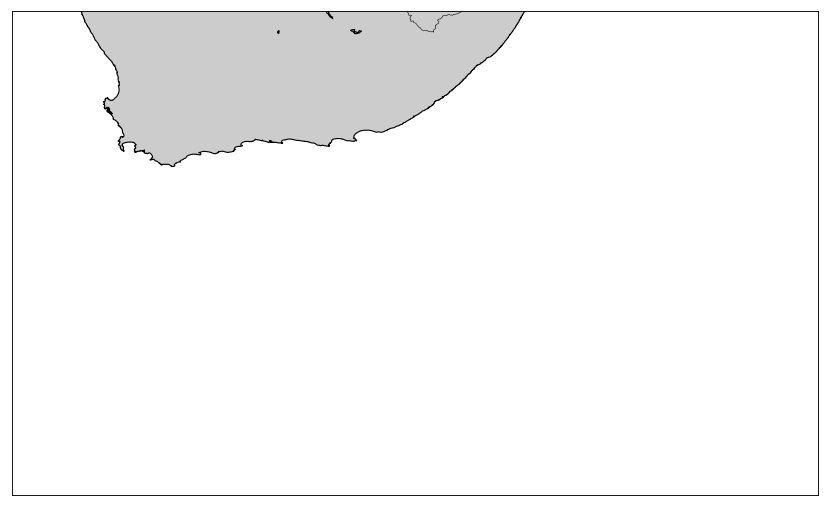

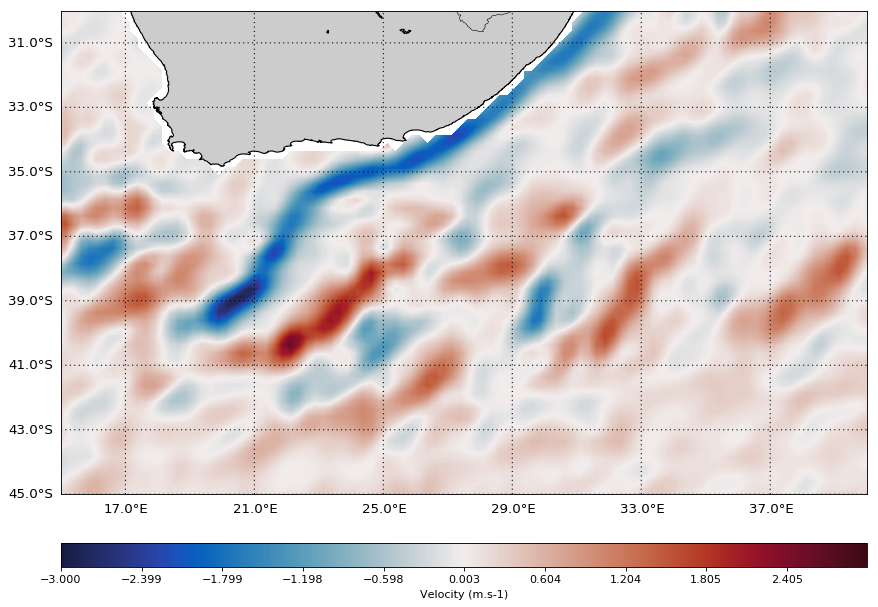

In [18]:

import pandas
import netCDF4
from   mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
from   netCDF4 import Dataset as open_ncfile
import numpy as np
import cmocean as cm
import netCDF4
from datetime import datetime, timedelta
#-- open netcdf file
drifters = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")
x = 0


start = drifters.date[x]
date = datetime.strptime(start, "%Y/%m/%d")
travel = drifters.days_travelled[x]
ID = drifters.id[x]

dates = [date +  timedelta(days=y) for y in range(0, 1)] #TRAVEL

globfiles = "/Users/hart-davis/Desktop/Scripts/GlobCurrent_Daily/20080101-GLOBCURRENT-L4-CUReul_15m-ALT_SUM-v03.0-fv01.0.nc"


nc = open_ncfile(globfiles)


east = nc.variables["eastward_eulerian_current_velocity"][0,:,:]
north = nc.variables["northward_eulerian_current_velocity"][0,:,:]

vel = east + north
velocity = vel

np.shape(velocity)

lon = nc.variables["lon"][:]
lat = nc.variables["lat"][:]

speed = np.sqrt(east**2+north**2)
#-- create figure and axes instances
dpi = 100
figure1 = plt.figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

west=15
east=40
north=-30
south=-45
#-- create map
map = Basemap(llcrnrlon=west, \
            llcrnrlat=south, \
            urcrnrlon=east, \
            urcrnrlat = north, \
            resolution = 'h', \
            projection = 'cyl', \
            lon_0 = west+(east-west)/2, \
            lat_0 = south+(north-south)/2)


#-- draw coastlines, state and country boundaries, edge of map
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
parallels = np.arange(np.floor(south),np.ceil(north),2.0)
meridians = np.arange(np.floor(west)+2,np.ceil(east),4.0)
#-- create and draw meridians and parallels grid lines
map.drawparallels(parallels, color='k',linewidth=1.0, dashes = [1,3],labels=[1,0,0,0],fmt='%2.1f',fontsize=12)
# draw meridians
map.drawmeridians(meridians,color='k',linewidth=1.0, dashes = [1,3],labels=[0,0,0,1],fmt='%2.1f',fontsize=12)

#-- convert latitude/longitude values to plot x/y values
x, y = map(*np.meshgrid(lon,lat))



#-- draw filled contours
cnplot = map.contourf(x,y,velocity,cmap=cm.cm.balance,levels=np.linspace(-3,3,1000))

#-- add colorbar
cbar = map.colorbar(cnplot,location='bottom',pad="10%")      #-- pad: distance between map and colorbar
cbar.set_label('Velocity (m.s-1)')                                      #-- add colorbar title string
#map.scatter(x1,y1,10,marker="o",color="white",zorder=3)
#-- add plot title
#plt.title('Velocity')
plt.plot()
plt.show()


# Plotting The Starting Locations of All Particles

# Plotting the Domain Trajectories of Particles

1246


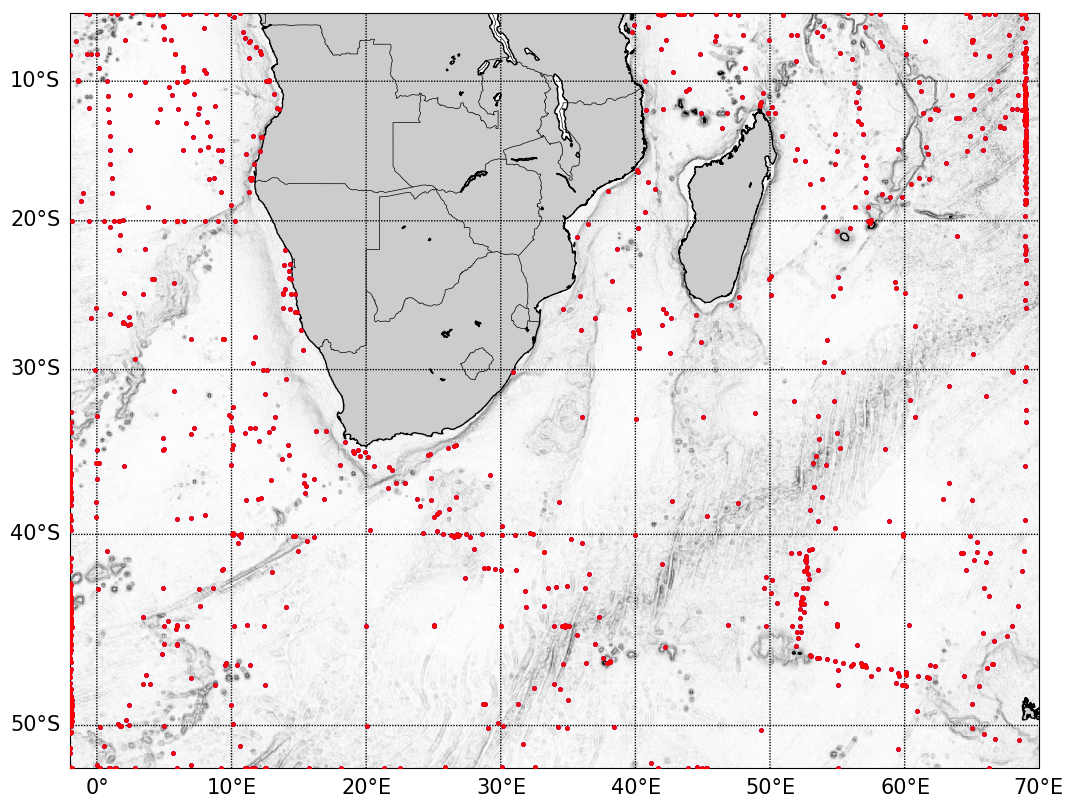

In [247]:
import math as mt
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt

sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")

V = []
lon = []
lat = []
md = []
y = []

for xx in range(0,1041):
    si = sites.id[xx]
    
    tset = glob.glob("/Users/hart-davis/Desktop/Scripts/Simulations/*.nc")
    ts = netCDF4.Dataset(tset[xx])

    lat1 = ts.variables["lat"][0,0]
    lon1 = ts.variables["lon"][0,0]
    date = ts.variables["time"][0]
    d = date - 630720000
    lon.append(lon1)
    lat.append(lat1)


from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas
sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")

slon = sites.lon[:]
slat = sites.lat[:]

slonn = np.asarray(slon)
slatt = np.asarray(slat)

map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

figure1 = figure(figsize=(13, 10), dpi=100, facecolor='w', edgecolor='k')


x,y = map(lon,lat)
s,t = map(slonn,slatt)
#-- draw coastlines, state and country boundaries, edge of map
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=15)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=15)
globfiles = "/Users/hart-davis/Desktop/Scripts/GEBCO_2014_6x6min_Global.nc"

nc = netCDF4.Dataset(globfiles)

ssh = nc.variables["Height"][:]
lon = nc.variables["lon"][:]
lat = nc.variables["lat"][:]

xx, yy = map(*np.meshgrid(lon,lat))

print len(sites.id)

clevs = np.arange(0,2,0.01)
        
        #-- draw filled contours
#cnplot = map.contourf(x,y,EKE,EKE,cmap=cm.cm.ice)

#cbar = map.colorbar(cnplot,location='bottom',pad="10%")      #-- pad: distance between map and colorbar
#cbar.set_label('m.s-1')                                      #-- add colorbar title string
cntour = map.contourf(xx,yy,ssh,cmap=cm.cm.gray_r,levels=np.linspace(-6000,0,100),alpha=0.041,zorder=1)

map.scatter(x,y,6,marker="o",color="red",alpha= 1,zorder=3)
map.scatter(s,t,6,marker="o",color="blue",alpha= 1,zorder=2)

#-- add plot title
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title('Drifter (Red) and Particle (Blue) Starting Locations')
plt.show()

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in arccos
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


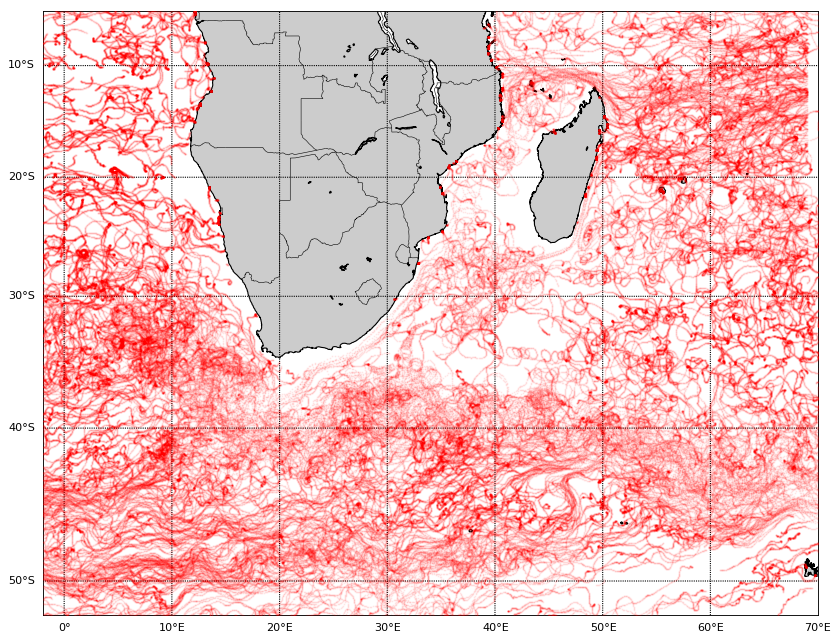

In [265]:
import math as mt
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob


sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")

V = []
lon = []
lat = []
md = []
y = []

for xx in range(0,1041):
    si = sites.id[xx]
    
    tset = glob.glob("/Users/hart-davis/Desktop/Scripts/Simulations/*.nc")
    ts = netCDF4.Dataset(tset[xx])

    lat1 = ts.variables["lat"][0]
    lon1 = ts.variables["lon"][0]
    date = ts.variables["time"][0]
    d = date - 630720000
    
    for x in range(0,len(lat1[:-1])):
        dist1 = np.arccos(np.cos(np.radians(90-lat1[x]))*np.cos(np.radians(90-lat1[x+1]))+np.sin(np.radians(90-lat1[x]))*np.sin(np.radians(90-lat1[x+1]))*np.cos(np.radians(lon1[x]-lon1[x+1])))*6371*1000
        velocity1 = dist1/21600
        V.append(velocity1)
    
        lon.append(lon1[x])
        lat.append(lat1[x])
        
        idd = sites.id[xx]
        
        xy = datetime.datetime.fromtimestamp(d[x]) 
        datetime.datetime(1970, 01, 01, 01, 01, 01)

        month_day = [xy.month]
        md.append(idd)
        year = [xy.year]
        y.append(year)

from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas

map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')


x1,y1 = map(lon,lat)
#-- draw coastlines, state and country boundaries, edge of map
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)


clevs = np.arange(0,2,0.01)
        
map.scatter(x1,y1,1,marker="o",color="red",alpha= 0.051,zorder=3)
#plt.title("(f)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [115]:
np.savetxt("/Users/hart-davis/Desktop/longitude.txt", lon, delimiter="\n")
np.savetxt("/Users/hart-davis/Desktop/latitude.txt", lat, delimiter="\n")
np.savetxt("/Users/hart-davis/Desktop/velocity.txt", V, delimiter="\n")
np.savetxt("/Users/hart-davis/Desktop/id.txt", md, delimiter="\n")

# Plotting Domain of Drifters

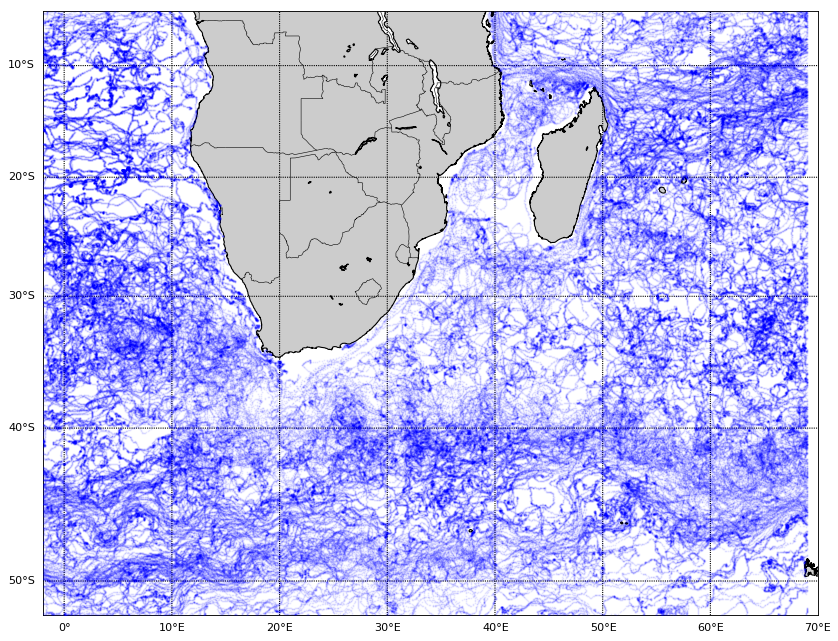

In [266]:
import math as mt
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas
import matplotlib.pyplot as plt


data = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Interpolate_Data2.txt", sep="\t")


lon = np.asarray(data.lon)
lat = np.asarray(data.lat)
time = np.asarray(data.time)
idd = np.asarray(data.id)

#nx = upp.shape[0]
#ny = upp.shape[0]

map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')


x,y = map(lon,lat)
#-- draw coastlines, state and country boundaries, edge of map
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)
map.scatter(x,y,1,marker="o",color="blue",alpha= 0.051,zorder=3)
#plt.title("(f)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title("Drifter Trajectories")
plt.show()


In [3]:
import math as mt
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from scipy import integrate, special
import pylab
from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas
data = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Interpolate_Data2.txt", sep="\t")

#t = np.linspace(0, 4*np.pi, 100)
xd = data.lon
yd = data.lat

map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")

V = []
lony = []
laty = []
md = []
y = []

for xx in range(0,1041):
    si = sites.id[xx]
    
    tset = glob.glob("/Users/hart-davis/Desktop/Scripts/Simulations/*.nc")
    ts = netCDF4.Dataset(tset[xx])

    lat1 = ts.variables["lat"][0]
    lon1 = ts.variables["lon"][0]
    date = ts.variables["time"][0]
    d = date - 630720000
    
    for x in range(0,len(lat1[:-1])):
        lony.append(lon1[x])
        laty.append(lat1[x])




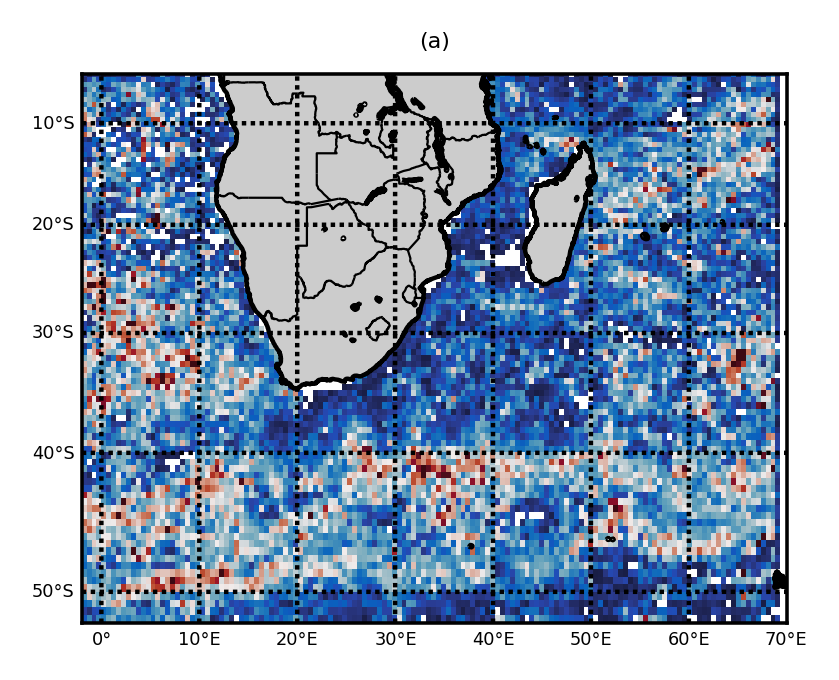

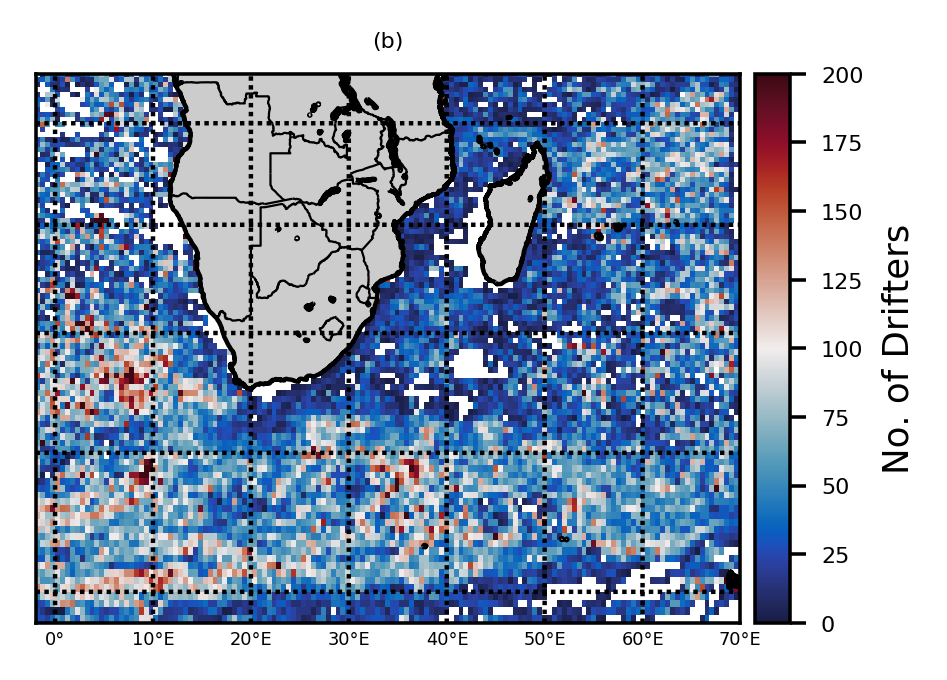

In [5]:
import cmocean as cm

figure1 = figure(figsize=(8, 5), dpi=320, facecolor='w', edgecolor='k')

gridxt = np.linspace(-10, 90, 200)
gridyt = np.linspace(-55, 45, 200)

gridt, _, _ = np.histogram2d(yd, xd, bins=[gridyt, gridxt])
grxt,gryt = map(gridxt,gridyt)

gridt [gridt == 0] = np.nan
gridt [gridt == 0] = np.nan

cmap = cm.cm.balance
cmap.set_under(color='white')

plt.subplot(2,2,1)
ax = map.pcolormesh(grxt,gryt,gridt, cmap=cmap,vmin = 0, vmax = 200)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=4)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=4)

plt.title("(a)",size=5)
#plt.xticks(size = 10)
#plt.yticks(size = 10)
plt.plot()

x = lony
y = laty

gridx = np.linspace(-10, 90, 200)
gridyt = np.linspace(-55, 45, 200)

grid, _, _ = np.histogram2d(y, x, bins=[gridyt, gridxt])
grx,gry = map(gridxt,gridyt)

grid [grid == 0] = np.nan
grid [grid == 0] = np.nan

cmap = cm.cm.balance
cmap.set_under(color='white')
figure1 = figure(figsize=(8, 5), dpi=320, facecolor='w', edgecolor='k')
plt.subplot(2,2,2)
at = map.pcolormesh(grx,gry,grid, cmap=cmap,vmin = 0, vmax =200)
plt.title("(b)",size=5)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k")
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=4)
cnt = map.colorbar()
cnt.ax.tick_params(labelsize=5)
cnt.set_label("No. of Drifters",size=8)
#plt.xticks(size = 10)
#plt.yticks(size = 10)
plt.plot()

#plt.title("Drifters That Pass Through Each Grid")
plt.show()

In [7]:
import math as mt
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from scipy import integrate, special
import pylab
from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas

sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")

V = []
lony = []
laty = []
md = []
y = []

for xx in range(0,1041):
    si = sites.id[xx]
    
    tset = glob.glob("/Users/hart-davis/Desktop/Scripts/Simulations/*.nc")
    ts = netCDF4.Dataset(tset[xx])

    lat1 = ts.variables["lat"][0]
    lon1 = ts.variables["lon"][0]
    date = ts.variables["time"][0]
    d = date - 630720000
    
    for x in range(0,len(lat1[:-1])):
        lony.append(lon1[x])
        laty.append(lat1[x])

In [8]:
x = lony
y = laty

map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

gridx = np.linspace(-10, 90, 200)
gridyt = np.linspace(-55, 45, 200)

grid, _, _ = np.histogram2d(y, x, bins=[gridyt, gridxt])
grx,gry = map(gridxt,gridyt)

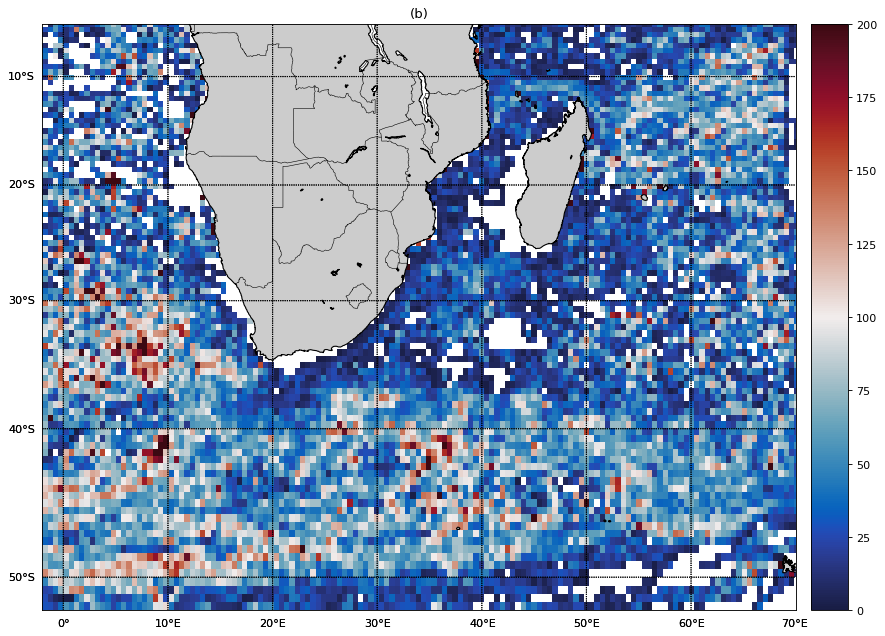

In [10]:
figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

grid [grid == 0] = np.nan
grid [grid == 0] = np.nan

cmap = cm.cm.balance
cmap.set_under(color='white')

map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)
map.pcolormesh(grx,gry,grid, cmap=cmap,vmin = 0, vmax =200)
map.colorbar()

map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title("(b)")
plt.show()

In [5]:
import math as mt
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from scipy import integrate, special
import pylab
from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas


map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

gridx1 = np.linspace(-10, 90, 200)
gridy1 = np.linspace(-55, 45, 200)
grx1,gry1 = map(gridx1,gridy1)


In [6]:
figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = cm.cm.balance
cmap.set_under(color='white')

map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)
map.pcolormesh(grx1,gry1,grid1, cmap=cmap, vmin = -200, vmax=200)

ax = plt.subplot(1,1,1)
ax.yaxis.set_label_position("right")
#plt.ylabel("Negative = More Drifters  Positive = More Parcels ")

map.colorbar()


plt.title("(c)")
plt.show()

NameError: name 'grid1' is not defined

In [273]:
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob

sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")

for xv in range(80,81):
    si = sites.id[xv]

    tset = "/Users/hart-davis/Desktop/Scripts/Simulations/PARCEL_" + str(si) + ".nc"

    ts = netCDF4.Dataset(tset)

    lat = ts.variables["lat"][0]
    lon = ts.variables["lon"][0]
    date = ts.variables["time"][0] - 630720000


    y = lat[:]
    x = lon[:]
    z = (date[:]  - date[0])/3600/24 # first derivative

    import matplotlib.pyplot as plt
    from mpl_toolkits.basemap import Basemap
    from matplotlib.collections import LineCollection
    import numpy as np

    m = Basemap(projection = "merc", resolution="c",llcrnrlon = -10, 
                llcrnrlat = -65, urcrnrlon = 90, urcrnrlat = 0,lat_0= -20,lon_0 = 0)

    x,y = m(x,y)
    fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

    m.drawcoastlines()
    m.drawcountries()
    m.drawcountries()
    m.fillcontinents()
    m.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
    m.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap='jet',
                        norm=plt.Normalize(0, z.max()))
    lc.set_array(z)
    lc.set_linewidth(2)

    plt.gca().add_collection(lc)
    axcb = fig.colorbar(lc)
    axcb.set_label('Days Travelled')
    #plt.savefig("/Users/hart-davis/Desktop/Scripts/Plots/PARCEL_"+ str(xv) + "png")
plt.title("Particle Trajectory")
plt.show()
print si



IOError: No such file or directory

# Velocity Histogram

# Distance Travelled

In [55]:
import math as mt
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

data = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Interpolate_Data2.txt", sep="\t")


lon = np.asarray(data.lon)
lat = np.asarray(data.lat)
time = np.asarray(data.time)
idd = np.asarray(data.id)

VV = []
for f in range(0,565252):
    R = 6373.0

    lat1 = radians(data.lat[f])
    lon1 = radians(data.lon[f])
    lat2 = radians(data.lat[f+1])
    lon2 = radians(data.lon[f+1])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    velocity = (R * c) * 1000 / 21600
    VV.append(velocity)



/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:35: RuntimeWarning:

invalid value encountered in arccos



In [75]:
Velo = np.array(VV)
print len(VV)
ve = Velo[~np.isnan(Velo)]

565252


In [79]:
figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

plt.title("Drifter Velocities of Entire Domain")


plt.ylim(0,1000)
plt.xlim(0,2.5)
plt.hist(ve, bins=1000)
plt.show()

KeyboardInterrupt: 

In [1]:
import math as mt
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians


sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")

V = []
lon = []
lat = []
md = []
y = []

for xx in range(68,69):
    si = sites.id[xx]
    
    tset = glob.glob("/Users/hart-davis/Desktop/Scripts/Simulations/*.nc")
    ts = netCDF4.Dataset(tset[xx])

    latt = ts.variables["lat"][0]
    lonn = ts.variables["lon"][0]
    date = ts.variables["time"][0]
    d = date - 630720000
    
    for x in range(0,len(latt[:-1])):
        R = 6373.0

        lat1 = radians(latt[x])
        lon1 = radians(lonn[x])
        lat2 = radians(latt[x+1])
        lon2 = radians(lonn[x+1])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        velocity = (R * c) * 1000 / 21600
        V.append(velocity)
    md.append(V)    
    lon.append(lonn)
    lat.append(latt)

from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas

map = Basemap(projection = "merc", resolution="i",llcrnrlon = -10, 
            llcrnrlat = -55, urcrnrlon = 90, urcrnrlat = 0,lat_0= -20,lon_0 = 0)

In [2]:
si

24258.0

In [78]:
N = 100

x,y = map(lon1,lat1)
c = Vel
fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)
map.scatter(x, y, 3, c=c, marker="o", cmap='jet',alpha=1,vmin=0,vmax=0.4)
map.colorbar()
plt.show()

TypeError: input must be an array, list, tuple or scalar

In [ ]:
distance x
distance y
differnce
over time

for xx in range(0,len(sites.id)):
    si = sites.id[xx]
    
    tset = glob.glob("/Users/hart-davis/Desktop/Scripts/Simulations/*.nc")
    ts = netCDF4.Dataset(tset[xx])

    latt = ts.variables["lat"][0]
    lonn = ts.variables["lon"][0]
    date = ts.variables["time"][0]
    d = date - 630720000
    
    for x in range(0,len(latt[:-1])):
        R = 6373.0

        lat1 = radians(latt[x])
        lon1 = radians(lonn[x])
        lat2 = radians(latt[x+1])
        lon2 = radians(lonn[x+1])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distX = (R * c) * 1000
        


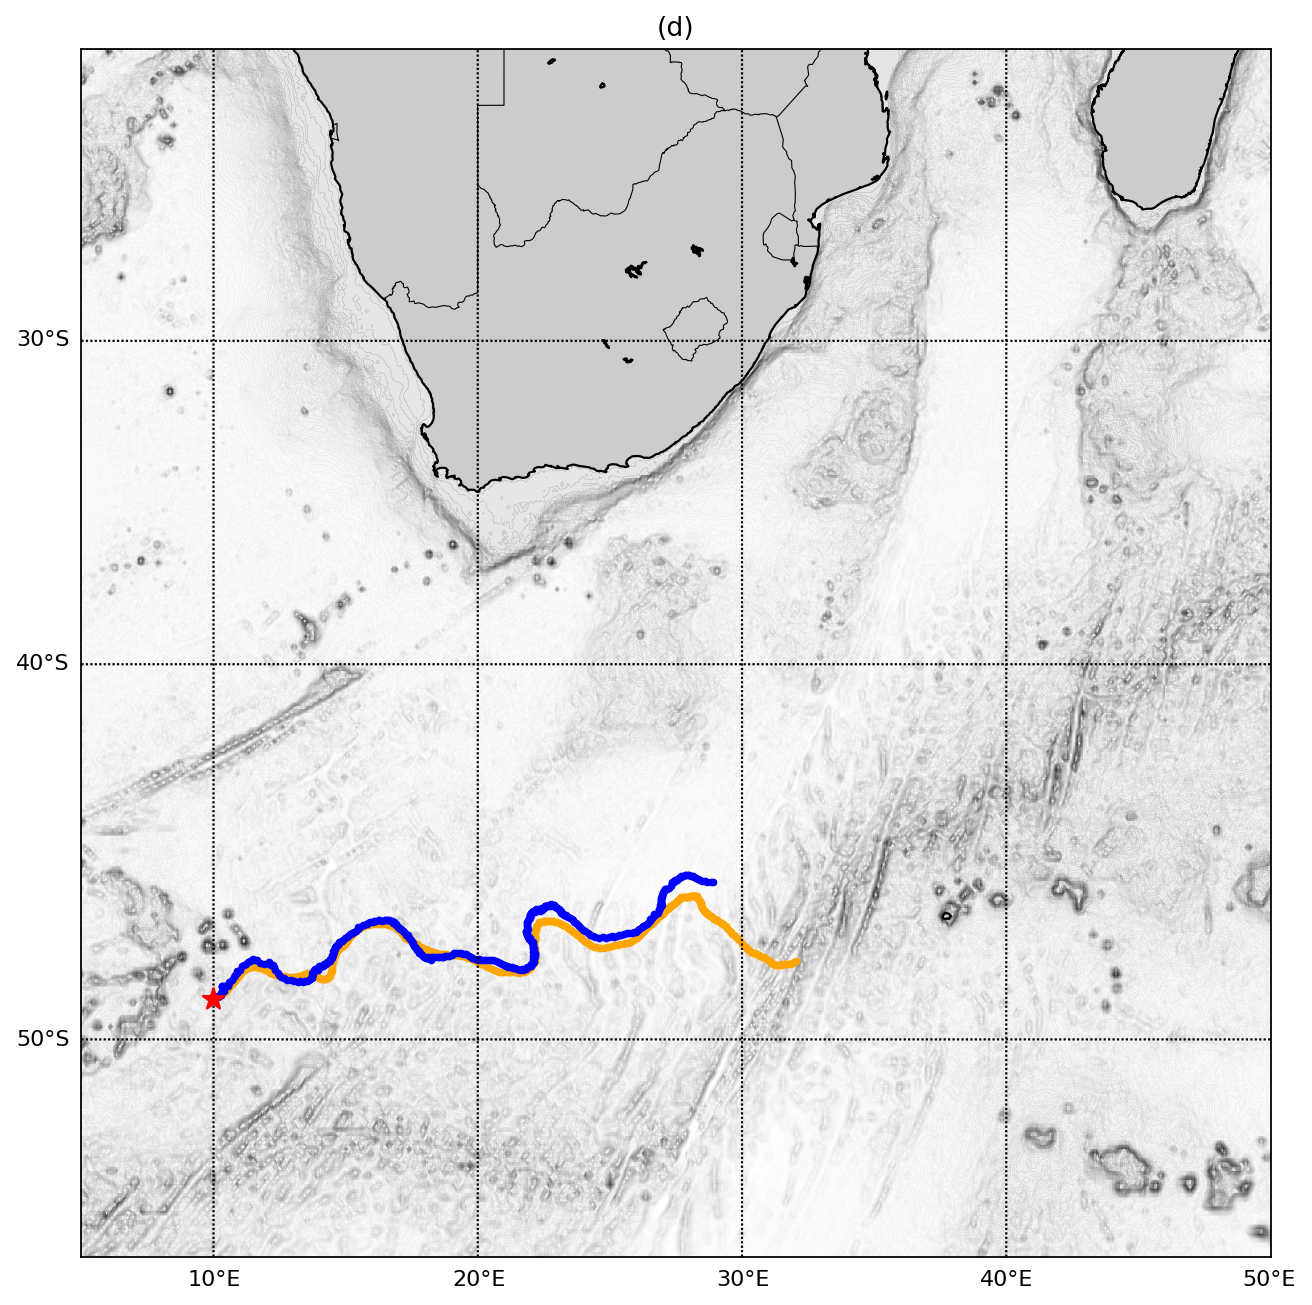

In [4]:
from   mpl_toolkits.basemap import Basemap
from   mpl_toolkits.basemap import cm as cma
import cmocean as cm
from matplotlib.pyplot import figure
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import matplotlib.patches as mpatches

sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")

globfiles = "/Users/hart-davis/Desktop/Scripts/GEBCO_2014_6x6min_Global.nc"


nc = netCDF4.Dataset(globfiles)

ssh = nc.variables["Height"][:]
lon = nc.variables["lon"][:]
lat = nc.variables["lat"][:]
msi = 17444
ssi = 53386
bsi = 9379
asi = 9526393

ts = netCDF4.Dataset("/Users/hart-davis/Desktop/Scripts/Simulations/PARCEL_" + str(msi) + ".nc")   
nc = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Simulations/Drifter_" + str(msi), sep = "\t")   
mlatt = nc.lat.values
mlonn = nc.lon.values       
mlat = ts.variables["lat"][0]
mlon = ts.variables["lon"][0]
mtime = ts.variables["time"][0]
d = mtime - 630720000
m = (d.data-d.data[0])/3600/24
    

sts = netCDF4.Dataset("/Users/hart-davis/Desktop/Scripts/Simulations/PARCEL_" + str(ssi) + ".nc")   
snc = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Simulations/Drifter_" + str(ssi), sep = "\t")   
slatt = snc.lat.values
slonn = snc.lon.values       
slat = sts.variables["lat"][0]
slon = sts.variables["lon"][0]    

bts = netCDF4.Dataset("/Users/hart-davis/Desktop/Scripts/Simulations/PARCEL_" + str(bsi) + ".nc")   
bnc = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Simulations/Drifter_" + str(bsi), sep = "\t")   
blatt = bnc.lat.values
blonn = bnc.lon.values       
blat = bts.variables["lat"][0]
blon = bts.variables["lon"][0] 
btime = bts.variables["time"][0]
d = btime - 630720000
a = (d.data-d.data[0])/3600/24

ats = netCDF4.Dataset("/Users/hart-davis/Desktop/Scripts/Simulations/PARCEL_" + str(asi) + ".nc")   
anc = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Simulations/Drifter_" + str(asi), sep = "\t")   
alatt = anc.lat.values
alonn = anc.lon.values       
alat = ats.variables["lat"][0]
alon = ats.variables["lon"][0] 
atime = ats.variables["time"][0]
d = atime - 630720000
w = (d.data-d.data[0])/3600/24
    
map = Basemap(projection = "merc", resolution="i",llcrnrlon =5, 
           llcrnrlat = -55, urcrnrlon =50, urcrnrlat = -20,lat_0= -20,lon_0 = 0)
# Mada, Sout, Ben, Agula

mx,my = map(mlon,mlat)
mpx,mpy = map(mlonn,mlatt)

sx,sy = map(slon,slat)
spx,spy = map(slonn,slatt)

bx,by = map(blon,blat)
bpx,bpy = map(blonn,blatt)

ax,ay = map(alon,alat)
apx,apy = map(alonn,alatt)

x, y = map(*np.meshgrid(lon,lat))


fig = figure(figsize=(13, 10), dpi=160, facecolor='w', edgecolor='k')

map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)
cntour = map.contourf(x,y,ssh,cmap=cm.cm.gray_r,levels=np.linspace(-6000,1,100),alpha=0.1)

#map.scatter(mx[0],my[0],100,marker="*",color="red",zorder=3)
#for x in range(0,1):
#    at = map.scatter(mx,my,4,color="orange", marker = "o", alpha = 1)
#    am = map.scatter(mpx[:-2],mpy[:-2],4,color="blue", marker = "o", alpha = 1)

map.scatter(sx[0],sy[0],100,marker="*",color="red",zorder=3)
for x in range(0,1):
    at = map.scatter(sx,sy,6,color="orange", marker = "o", alpha = 1)
    am = map.scatter(spx,spy,6,color="blue", marker = "o", alpha = 1)

#map.scatter(bx[0],by[0],100,marker="*",color="red",zorder=3)
#cntour = map.contourf(x,y,ssh,cmap=cm.cm.gray_r,levels=np.linspace(-6000,1,100),alpha=0.1)
#for xx in range(0,1):
#    at = map.scatter(bx,by,3,color="orange", marker = "o", alpha = 1)
#    am = map.scatter(bpx[:-1],bpy[:-1],3,color="blue", marker = "o", alpha = 1)

#plt.colorbar(cntour)
#map.scatter(ax[0],ay[0],100,marker="*",color="red",zorder=3)
#for x in range(0,1):
#    at = map.scatter(ax[:],ay[:],3,color="orange", marker = "o", alpha = 1)
#    am = map.scatter(apx[:-2],apy[:-2],3,color="blue", marker = ".", alpha = 1)

plt.title("(d)")
#cbar = plt.colorbar(am)
#cbar1 = plt.colorbar(at)

#cbar.set_label("Time in Days")
plt.show()

In [52]:
sx.shape

(421,)

In [4]:
import netCDF4 
from netCDF4 import date2index
import numpy as np
import xarray as xr, xray
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime
from matplotlib.pyplot import hold, figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show, savefig
import cmocean as cm
import matplotlib.patches as mpatches
import pandas



diff = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Test_Ship.txt", sep = "\t")

tset = "/Users/hart-davis/Desktop/Scripts/Ship_example.nc"
ts = netCDF4.Dataset(tset)

lon = ts.variables["lon"][:,:]
lat = ts.variables["lat"][:,:]
date = ts.variables["time"][0]
d = date - 630720000
a = (d.data-d.data[0])/3600/24
a = np.array(a)

mlon = diff.Lon.values
mlat = diff.Mlat.values

nlon = diff.Lon.values
nlat = diff.Nlat.values

dlon = [20.04095]
dlat = [-35.5186455861]
silon = [25.6981]
silat = [-35.238429]
slon = lon[0]
slat = lat[0]

m = Basemap(projection = "merc", resolution="i",llcrnrlon = 15, 
            llcrnrlat = -43, urcrnrlon = 30, urcrnrlat = -30,lat_0= -20,lon_0 = 0)

figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
#m.pcolor(lonData, latData, U, V)
#cbar = m.colorbar()
#cbar.ax.set_ylabel('Current speed in ' + units)
si1,si2 = m(silon,silat)
s1,s2 = m(lon,lat)
a1,a2 = m(nlon,nlat)
b1,b2 = m(mlon,mlat)
f1,f2 = m(dlon,dlat)
#latdata, londata = np.meshgrid(latData,lonData)
#latD, lonD = m(latdata, londata)
#im1 = m.quiver(lonData,latData,U,V,cmap=plt.cm.jet)
m.drawcoastlines()

m.fillcontinents()
m.drawmapboundary()
#m.bluemarble()
m.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=15)
m.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=15)

#m.scatter(b1,b2,10,marker = ".", color="black",alpha = 1)
m.scatter(si1,si2,100,marker = "*", color="orange",alpha = 1,zorder=3)

for x in range(0,len(lon)):
    at = m.scatter(s1[x,:],s2[x,:],0.1, c=a,cmap='jet', marker = ".", alpha = 1)
    
m.scatter(f1,f2,100,marker = "*", color="black",alpha = 1,zorder=3)

cbar = plt.colorbar(at)
cbar.set_label("Time in Days")
plt.title("(a)")

plt.show()

TypeError: __init__() got an unexpected keyword argument 'vmin'

In [ ]:
from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
from geopy.distance import great_circle as dist
from osgeo import gdal

sites = pandas.read_csv("/Users/hart-davis/Desktop/2016-11-09 LARVIKA 04a hake FOG biologicals.txt", sep="\t")


lon = sites.start_longitude.values
lat = sites.start_latitude.values

endlat = sites.end_latitude.values
endlon = sites.end_longitude.values

hake = sites.mnemonic

N = 100

x,y = map(x1,y1)
ex,xy = map(endlon,endlat)
c = vel
fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)
map.scatter(x, y,3, marker="o", cmap='jet',alpha=1,vmin=0,vmax=0.4)

plt.show()


In [3]:
from   mpl_toolkits.basemap import Basemap, cm
#import cmocean as cm
from matplotlib.pyplot import figure
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import numpy.ma as ma

#from geopy.distance import great_circle as dist
#from osgeo import gdal #unnecessary at the moment

sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Interpolate_Data2.txt", sep="\t")


lon = np.array(sites.lon.values)
lat = np.array(sites.lat.values)
vel = sites.speed.values/100
ymd = sites.date # ymd stands for year month day
t = sites.time

# define the lon/lat grid
x = np.linspace(-10, 90, 200)
y = np.linspace(-55, 45, 200)
longitudes, latitudes = np.meshgrid(x, y, sparse=True)
#longitudes = np.transpose(longitudes)
longitudes = np.squeeze(longitudes)
latitudes = np.squeeze(latitudes)
velocities = np.zeros([len(longitudes),len(latitudes)])
velocities[:] = np.nan
indxcheck = np.zeros([len(longitudes),len(latitudes)])

# loop through the grid, find lon/lat values for each 0.25 grid cell and average corresponding velocities
for i in np.arange(0, len(longitudes)-1, 1):
    for j in np.arange(0, len(latitudes)-1, 1):
        indx = np.where((lon>=longitudes[i]) & (lon<longitudes[i+1]) & (lat>=latitudes[j]) & (lat<latitudes[j+1]))[0]
        indxcheck[i,j]=len(indx)
        # if no drifters found put a nan in the grid cell
        if indx.size == 0:
            velocities[i,j] = np.nan
        else:
            velocities[i,j] = np.mean(vel[indx])

# needed to transpose to plot it with pcolormesh
velocities = np.transpose(velocities)
# needed to make it a masked array to make nan appear as white in pcolormesh
velocities = ma.masked_where(np.isnan(velocities),velocities)

map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

x,y = map(longitudes,latitudes)
c = vel

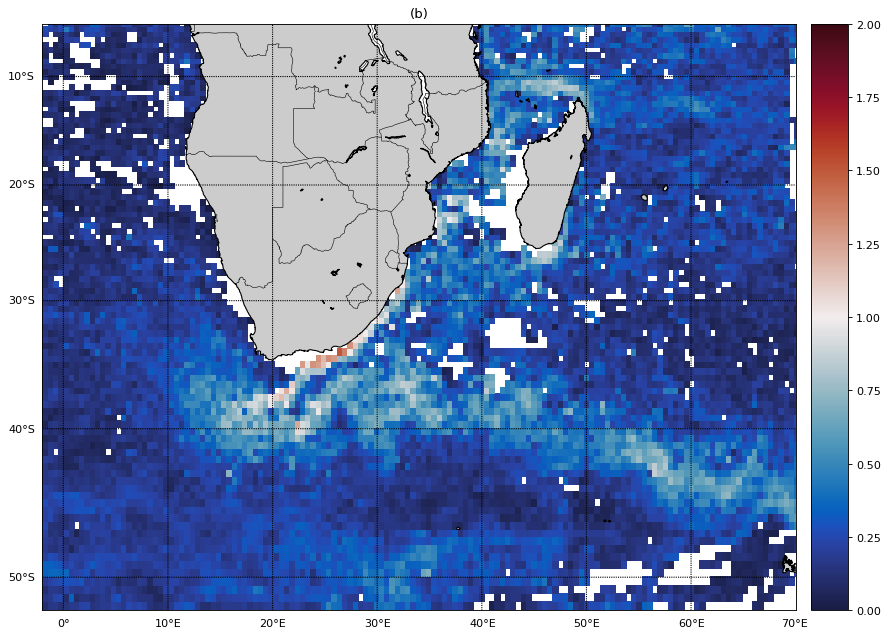

In [48]:
import cmocean as cm
fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)
map.pcolormesh(x,y, velocitie,cmap=cm.cm.balance, vmin=0, vmax=2)
map.colorbar()
plt.title("(b)")
plt.show()

In [12]:
import math as mt
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob


sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")

V = []
lon = []
lat = []
md = []
y = []

for xx in range(0,1041):
    si = sites.id[xx]
    
    tset = glob.glob("/Users/hart-davis/Desktop/Scripts/Simulations/*.nc")
    ts = netCDF4.Dataset(tset[xx])

    lat1 = ts.variables["lat"][0]
    lon1 = ts.variables["lon"][0]
    date = ts.variables["time"][0]
    d = date - 630720000
    
    for x in range(0,len(lat1[:-1])):
        dist1 = np.arccos(np.cos(np.radians(90-lat1[x]))*np.cos(np.radians(90-lat1[x+1]))+np.sin(np.radians(90-lat1[x]))*np.sin(np.radians(90-lat1[x+1]))*np.cos(np.radians(lon1[x]-lon1[x+1])))*6371*1000
        velocity1 = dist1/21600
        V.append(velocity1)
    
        lon.append(lon1[x])
        lat.append(lat1[x])
        
        xy = datetime.datetime.fromtimestamp(d[x]) 
        datetime.datetime(1970, 01, 01, 01, 01, 01)

        month_day = [xy.month]
        md.append(month_day)
        year = [xy.year]
        y.append(year)
        



/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arccos


KeyboardInterrupt: 

In [1]:
#import cmocean as cm
from matplotlib.pyplot import figure
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import numpy.ma as ma
from   mpl_toolkits.basemap import Basemap, cm

#from geopy.distance import great_circle as dist
#from osgeo import gdal #unnecessary at the moment

sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Output_All/parcel_interpolate_data.txt", sep="\t")


lon = sites.lon.values
lat = sites.lat.values
vel = sites.velocity.values

# define the lon/lat grid
x = np.linspace(-10, 90, 200)
y = np.linspace(-55, 45, 200)
longitudes, latitudes = np.meshgrid(x, y, sparse=True)
#longitudes = np.transpose(longitudes)
longitudes = np.squeeze(longitudes)
latitudes = np.squeeze(latitudes)
velocitie = np.zeros([len(longitudes),len(latitudes)])
velocitie[:] = np.nan
indxcheck = np.zeros([len(longitudes),len(latitudes)])

# loop through the grid, find lon/lat values for each 0.25 grid cell and average corresponding velocities
for i in np.arange(0, len(longitudes)-1, 1):
    for j in np.arange(0, len(latitudes)-1, 1):
        indx = np.where((lon>=longitudes[i]) & (lon<longitudes[i+1]) & (lat>=latitudes[j]) & (lat<latitudes[j+1]))[0]
        indxcheck[i,j]=len(indx)
        # if no drifters found put a nan in the grid cell
        if indx.size == 0:
            velocitie[i,j] = np.nan
        else:
            velocitie[i,j] = np.mean(vel[indx])

# needed to transpose to plot it with pcolormesh
velocitie = np.transpose(velocitie)
# needed to make it a masked array to make nan appear as white in pcolormesh
velocitie= ma.masked_where(np.isnan(velocitie),velocitie)

map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

x,y = map(longitudes,latitudes)
c = vel

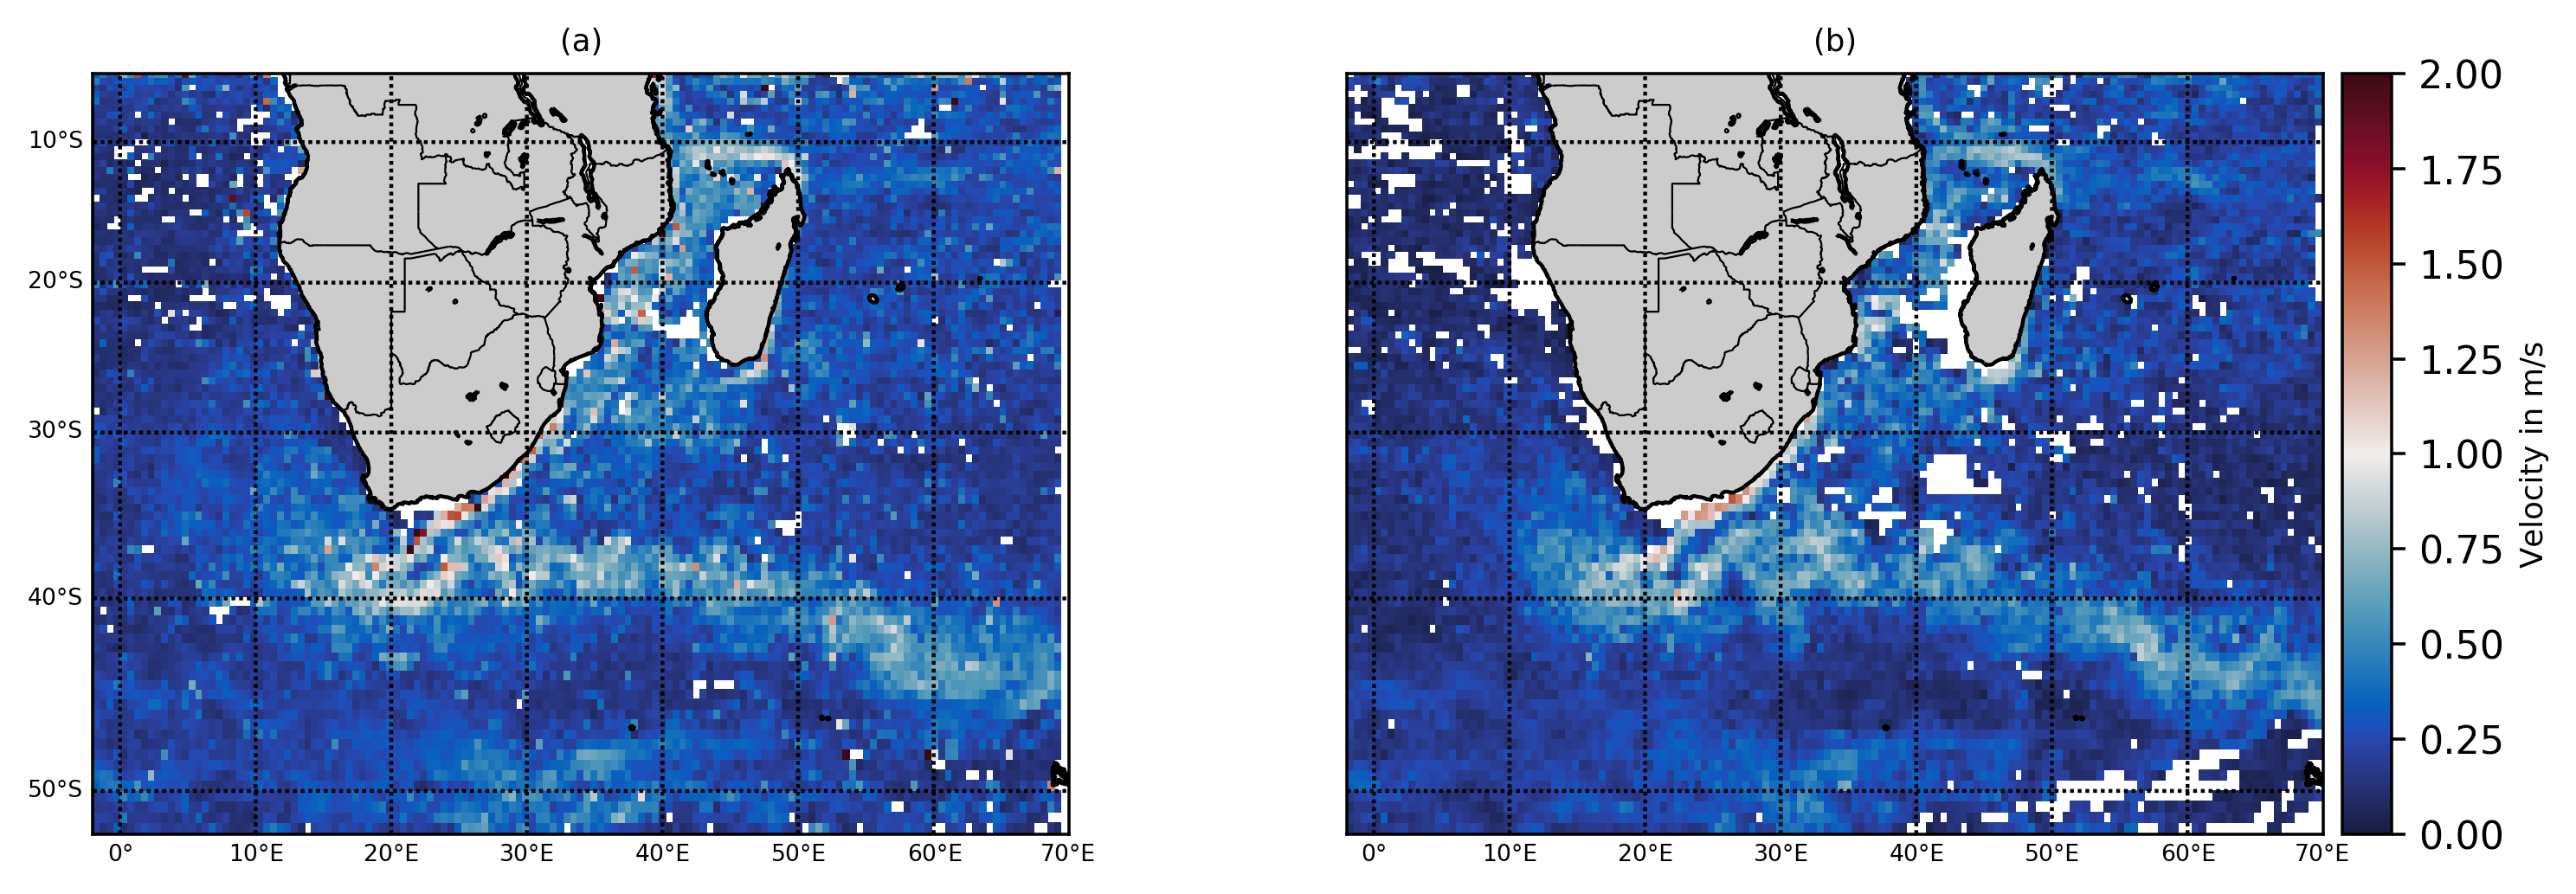

In [16]:
import cmocean as cm
fig = figure(figsize=(11, 8), dpi=320, facecolor='w', edgecolor='k')

plt.subplot(2,2,1)
map.pcolormesh(x,y, velocities,cmap=cm.cm.balance, vmin=0, vmax=2)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=6)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=6)
plt.xticks(size = 2)
plt.yticks(size = 2)
plt.title("(a)",size=8)
plt.plot()

plt.subplot(2,2,2)

v = velocitie
map.pcolormesh(x,y, v,cmap=cm.cm.balance, vmin=0, vmax=2)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k")
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=6)
cb = map.colorbar()
cb.set_label("Velocity in m/s",size=8)
plt.xticks(size = 1)
plt.yticks(size = 1)
plt.title("(b)",size=8)
plt.plot()
plt.show()

Break

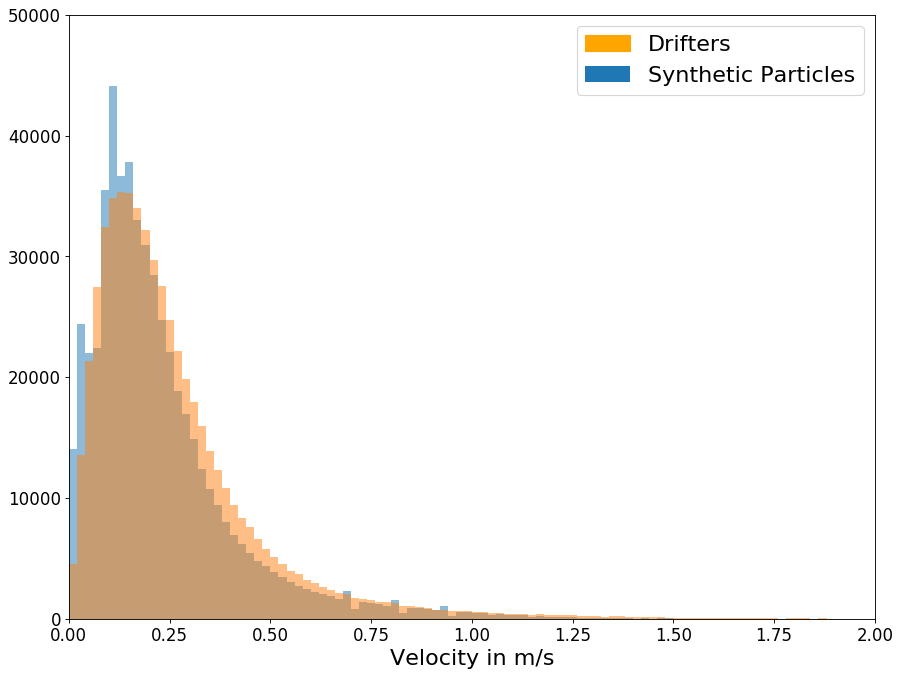

In [9]:
#import cmocean as cm
from matplotlib.pyplot import figure
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import numpy.ma as ma
from   mpl_toolkits.basemap import Basemap, cm
import matplotlib.patches as mpatches
from scipy.stats import norm

sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Interpolate_Data2.txt", sep="\t")

velo = sites.speed.values/100

site = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Output_All/parcel_interpolate_data.txt", sep="\t")

vel = site.velocity

vel = vel.values
VEL = [x for x in vel if str(x) != 'nan']
VEL = [ '%.2f' % elem for elem in VEL ]
VEL = np.array(VEL).astype(np.float)
VEL = VEL[np.where( VEL > 0)]

fig = figure(figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
veli = velo
meanv = np.mean(vel)


ve = [x for x in veli if str(x) != 'nan']
meanve = np.mean(ve)
median = np.median(ve)
std = np.std(ve)

ve = [ '%.3f' % elem for elem in ve ]
ve = np.array(ve).astype(np.float)

blue = mpatches.Patch(color='orange', label='Drifters')
orange = mpatches.Patch(label='Synthetic Particles')

bins=np.histogram(np.hstack((VEL,ve)), bins=500)[1]


fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0,2)
plt.ylim(0,50000)
#plt.suptitle("Domain Velocities in m.s-1 ")
plt.hist(VEL,bins,alpha=0.5)
plt.hist(ve,bins,alpha=0.5)
plt.legend(handles=[blue,orange],prop={'size': 20})
plt.xlabel("Velocity in m/s", size = 20)
#plt.title("(a)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()

In [484]:
print np.mean(ve)
print np.std(ve)

0.276539384821
0.447628305735


In [100]:
nanlist

[]

In [52]:
#import cmocean as cm
from matplotlib.pyplot import figure
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import numpy.ma as ma
from   mpl_toolkits.basemap import Basemap, cm
import matplotlib.patches as patches

site = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Output_All/PARCEL_Interp_Data.txt", sep="\t")

lat = site.Latitude
lon = site.Longitude

both = np.vstack((lat,lon))

la = []
lo = []

for w in range(0, 1):
    x = np.where(((both[0] >= -30) & (both[0] <= -10) & (both[1] >= 20) & (both[1] <= 50)))
    x = x[0]
    for f in range(0,1):
        z = lat[x]
        u = lon[x]
        la.append(z)
        lo.append(u)


/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in greater_equal
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in less_equal


In [53]:
np.savetxt("/Users/hart-davis/Desktop/Scripts/Domains/Benguela/latitude.txt", la, delimiter="\n")
np.savetxt("/Users/hart-davis/Desktop/Scripts/Domains/Benguela/longitude.txt", lo, delimiter="\n")

In [51]:
longitudes = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Benguela/parcel_longitude.txt", sep="\t")
latitudes = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Benguela/parcel_latitude.txt", sep="\t")
solongitudes = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Southern Ocean/parcel_longitude.txt", sep="\t")
solatitudes = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Southern Ocean/parcel_latitude.txt", sep="\t")
relongitudes = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Retro/parcel_longitude.txt", sep="\t")
relatitudes = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Retro/parcel_latitude.txt", sep="\t")
aglongitudes = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Agulhas/parcel_longitude.txt", sep="\t")
aglatitudes = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Agulhas/parcel_latitude.txt", sep="\t")
rlatitude = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Return Current/parcel_latitude.txt", sep="\t")
rlongitude = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Return Current/parcel_longitude.txt", sep="\t")
mlongitudes = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Mada/parcel_longitude.txt", sep="\t")
mlatitudes = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Mada/parcel_latitude.txt", sep="\t")

## Inpolygon

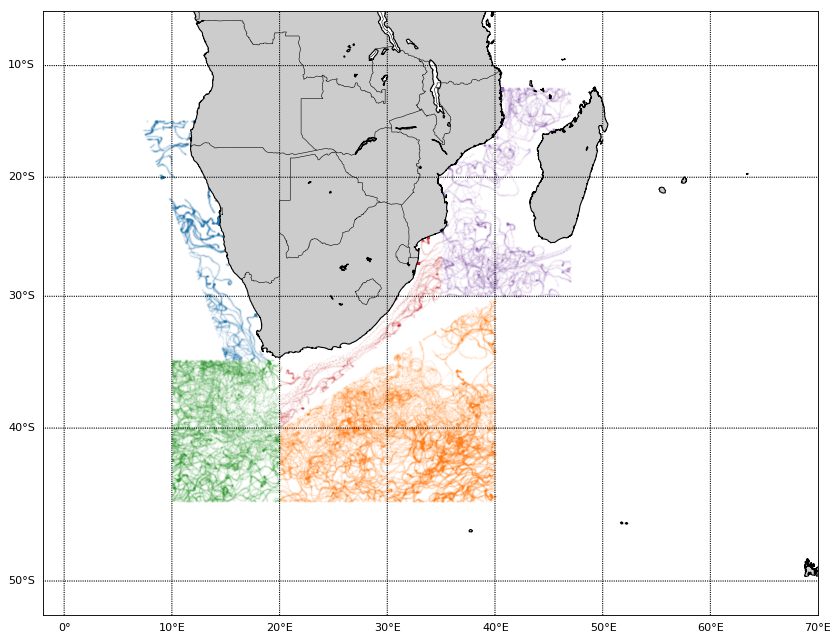

In [52]:
mlat = mlatitudes.values
mlon = mlongitudes.values

relat = relatitudes.values
relon = relongitudes.values

solat = rlatitude.values
solon = rlongitude.values

lat = latitudes.values
lon = longitudes.values

alat = aglatitudes.values
alon = aglongitudes.values


rlongi = rlongitude.values
rlati = rlatitude.values
map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

x,y = map(lon,lat)
sx,sy = map(solon,solat)
rx,ry = map(relon,relat)
ax,ay = map(alon, alat)
mx,my = map(mlon, mlat)
rxx, ryy = map(rlongi, rlati)

fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)
map.scatter(x,y,1,marker="o",alpha= 0.051)
map.scatter(sx,sy,1,marker="o",alpha= 0.051)
map.scatter(rx,ry,1,marker="o",alpha= 0.051)
map.scatter(ax,ay,1,marker="o",alpha= 0.051)
map.scatter(mx,my,1,marker="o",alpha= 0.051)
#map.scatter(rxx,ryy,1,marker="o",alpha= 0.051)

plt.show()

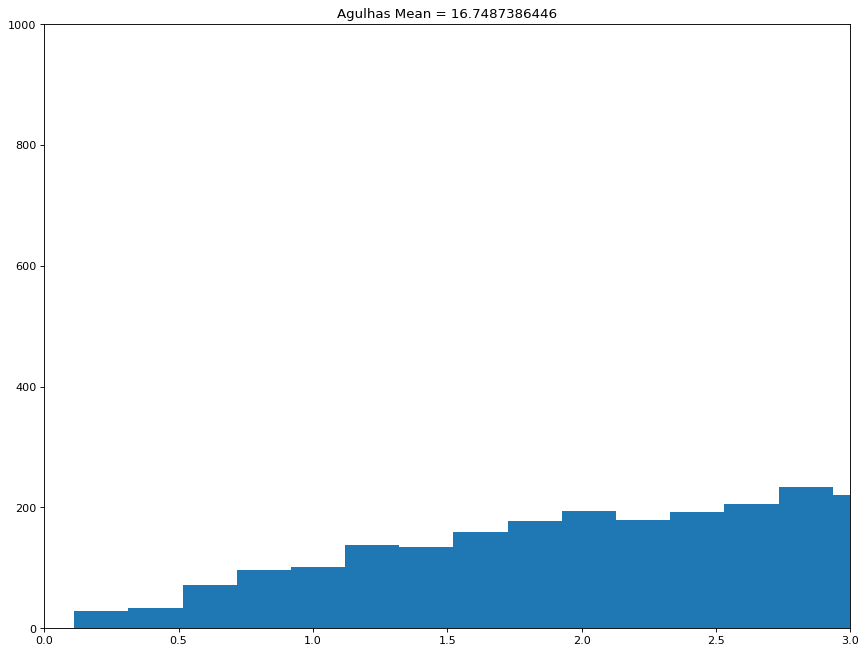

In [7]:
fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
mean = np.mean(ev)
plt.xlim(0,3)
plt.ylim(0,1000)
plt.hist(ev, bins=10000)
plt.title("Agulhas Mean = " + str(mean))
plt.show()

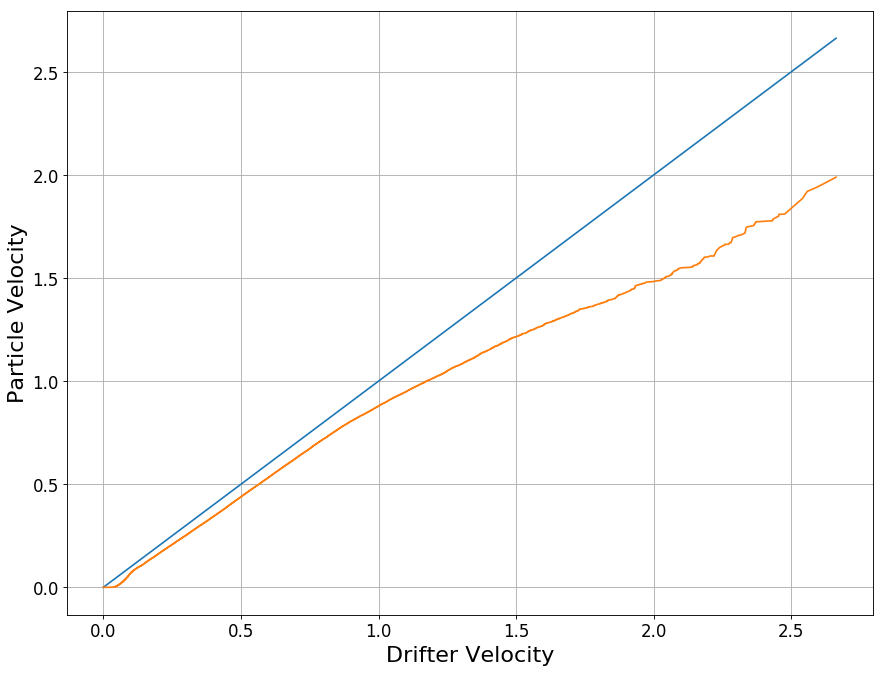

In [34]:
import numpy as np 
import pylab 
import scipy.stats as stats

ve = [i for i in ve if i <= 3]
vel = [i for i in vel if i <= 3]
parc_vel = np.sort(vel[0:len(ve)])
drif_vel = np.sort(ve[0:len(ve)])
fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(drif_vel, drif_vel)
plt.plot(drif_vel, parc_vel)
plt.grid()
plt.xlabel("Drifter Velocity", size = 20)
plt.ylabel("Particle Velocity", size = 20)
#plt.title("(a)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [43]:
from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
from geopy.distance import great_circle as dist
from osgeo import gdal
import geopy 

lon = df.Longitude[x[0]]
lat = df.Latitude[x[0]]

lon = lon
lat = lat

xl = np.array(lon)
yl = np.array(lat)

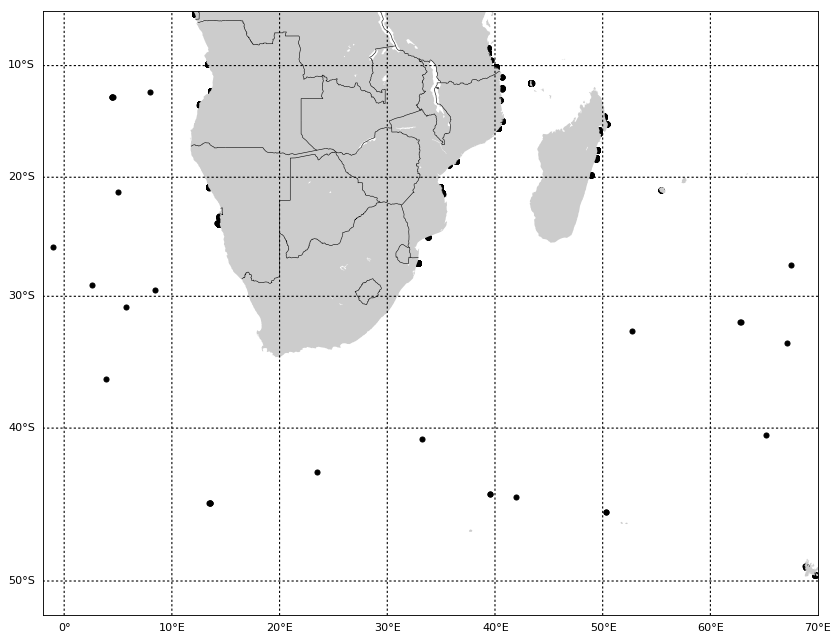

In [54]:
map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

xx,yy = map(xl,yl)

fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')


map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)
map.scatter(xx,yy,20,marker="o",alpha= 1,color="k")
plt.show()

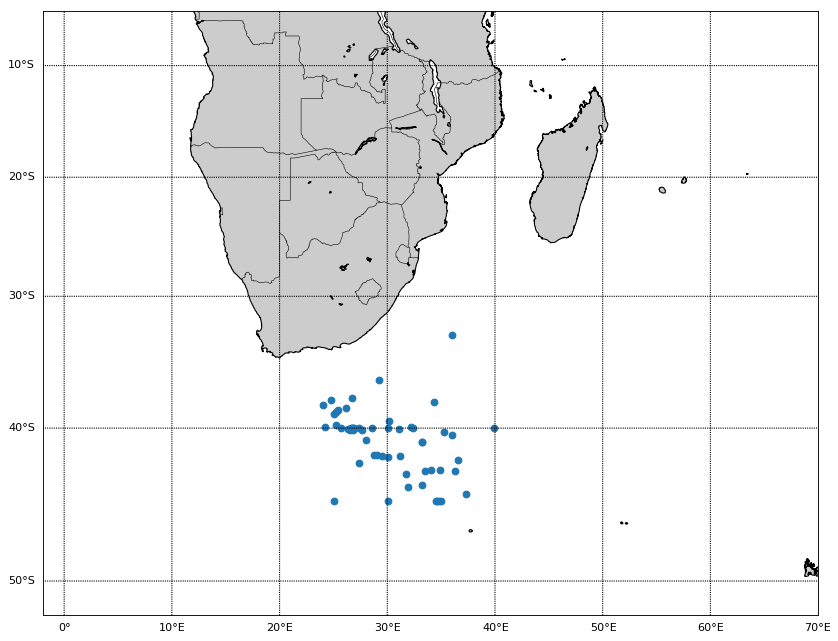

In [54]:
from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas as pd
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
from geopy.distance import great_circle as dist
from osgeo import gdal
import geopy 
from matplotlib.path import Path

data = pd.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt",sep='\t')

lon = data.lon.values
lat = data.lat.values
idd = data.id.values
#vel = data.velocity.values

# define polygon points, make sure that you close the polygon, i.e. your last lon/lat pair = first lon/lat pair
# e.g. p = Path([(lon1,lat1),(lon2,lat2),(lon3,lat3),...,(lon1,lat1)])
p = Path([(20,-45), (20,-40), (40,-30), (40,-45)])

InPolygon = np.zeros(len(lon))

for ii in range(0,len(lon),1):
	if p.contains_points([(lon[ii], lat[ii])]):
		InPolygon[ii] = 1
	else:
		InPolygon[ii] = 0

from matplotlib import pyplot as plt
indx = np.where (InPolygon == 1)


fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

x,y = map(lon[indx],lat[indx])
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)
map.scatter(x,y)
plt.show()

In [55]:

iddd = idd[indx]
la = lat[indx]
lo = lon[indx]
ve = vel[indx]

In [56]:
np.savetxt("/Users/hart-davis/Desktop/Scripts/Domains/Return Current/drifter_latitude.txt", la, delimiter="\n")
np.savetxt("/Users/hart-davis/Desktop/Scripts/Domains/Return Current/drifter_id.txt", iddd, delimiter="\n")
np.savetxt("/Users/hart-davis/Desktop/Scripts/Domains/Return Current/drifter_longitude.txt", lo, delimiter="\n")
np.savetxt("/Users/hart-davis/Desktop/Scripts/Domains/Return Current/drifter_vel.txt", ve, delimiter="\n")

#Agulhas Current

#p = Path([(20,-40), (20,-30), (35,-20), (35,-30)])

#Agulhas Retroflection

#p = Path([(10,-45), (10,-35), (20,-35), (20,-45)])

#Benguela 

#p = Path([(15,-35), (7,-15), (20,-15), (20,-35)])

#Southern

#p = Path([(10,-45), (10,-40), (35,-40), (35,-45)])

#Mada

#p = Path([(35,-30), (35,-12), (47,-12), (47,-30)])

#Return 

#p = Path([(20,-40), (35,-30), (35,-40), (20,-40)])

In [4]:
longitudes = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Benguela/drifter_longitude.txt", sep="\t")
latitudes = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Benguela/drifter_latitude.txt", sep="\t")
idd = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Benguela/drifter_id.txt", sep="\t")

lon = longitudes.values
lat = latitudes.values
idt = idd.values


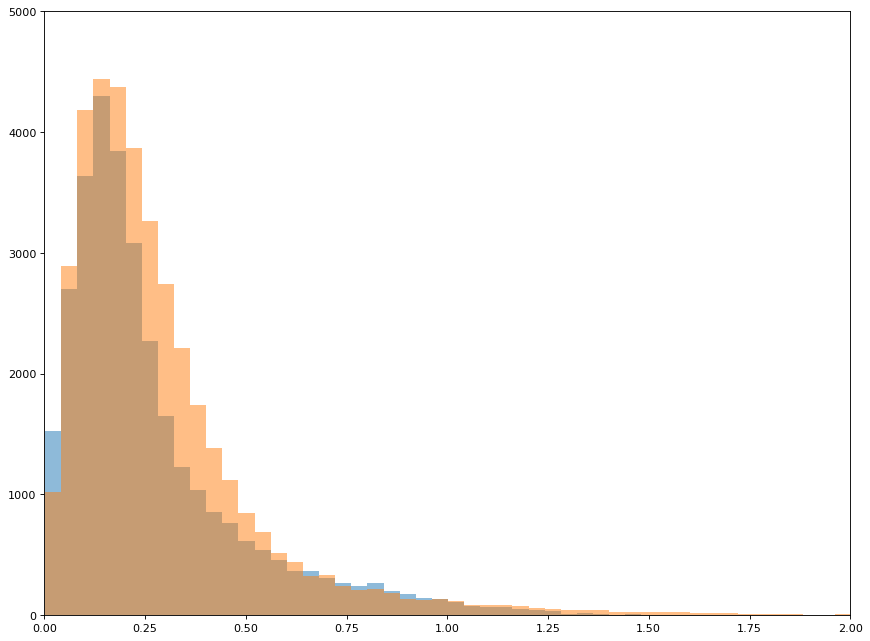

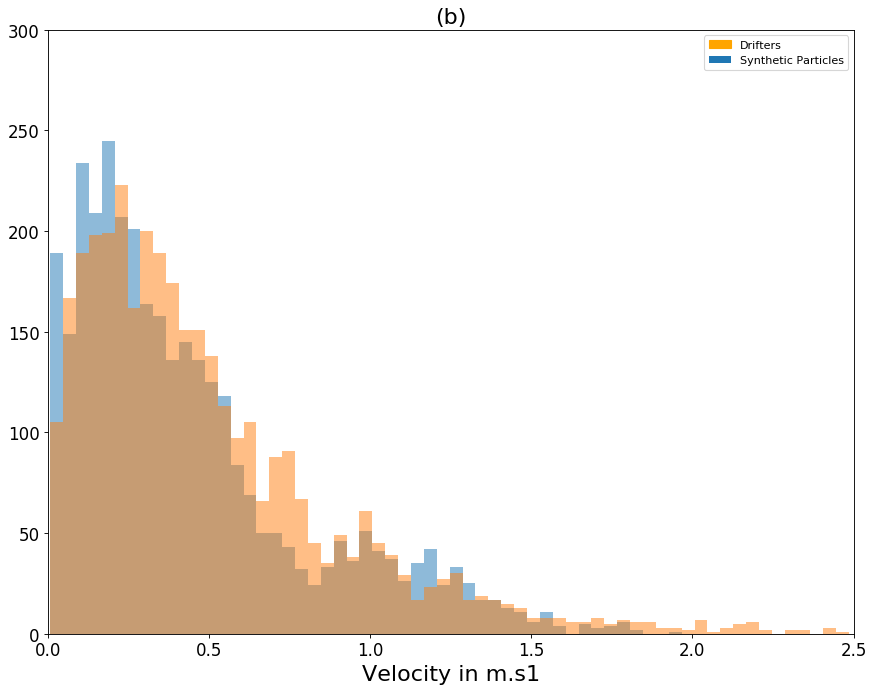

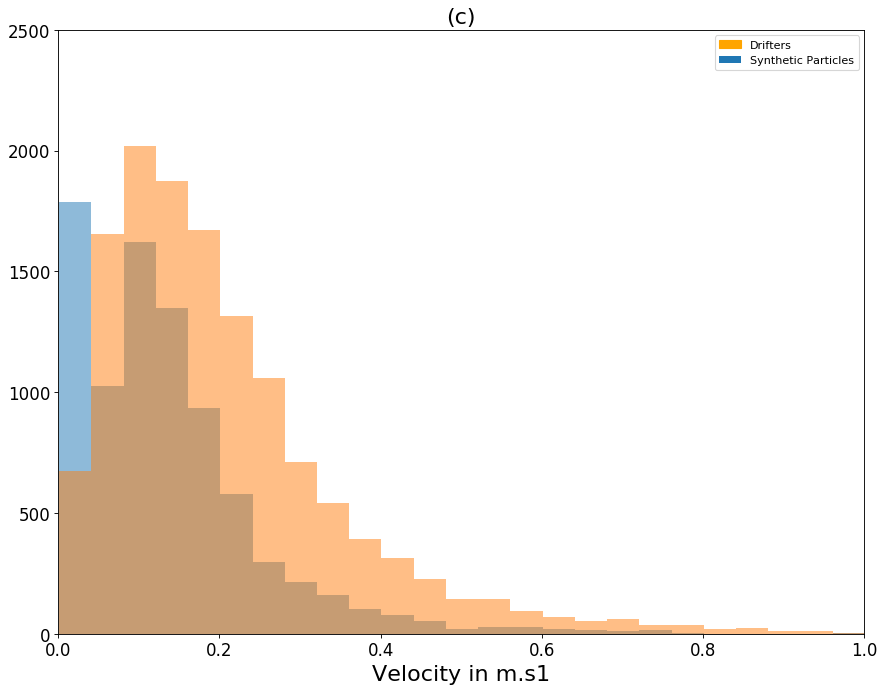

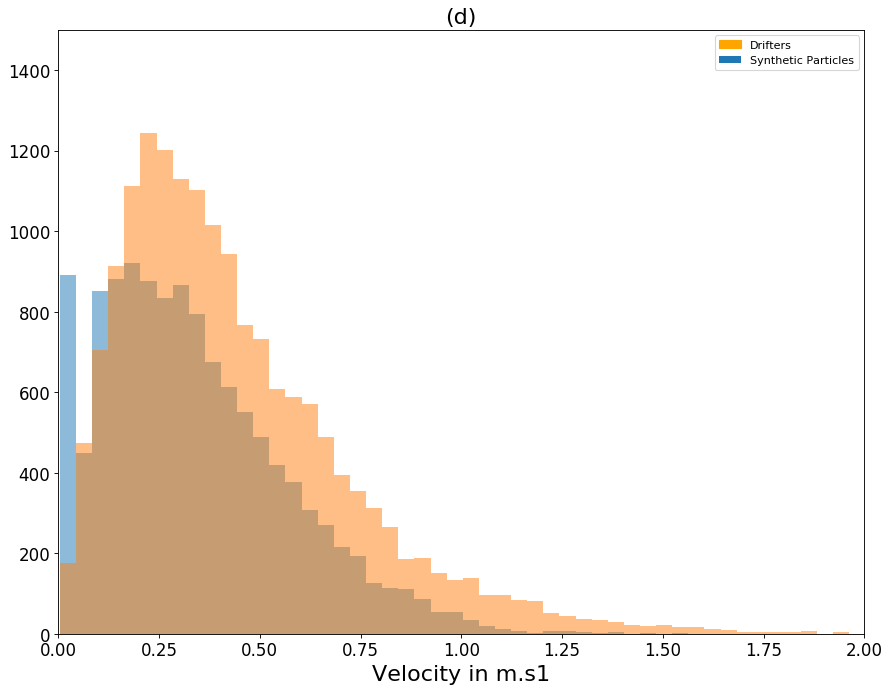

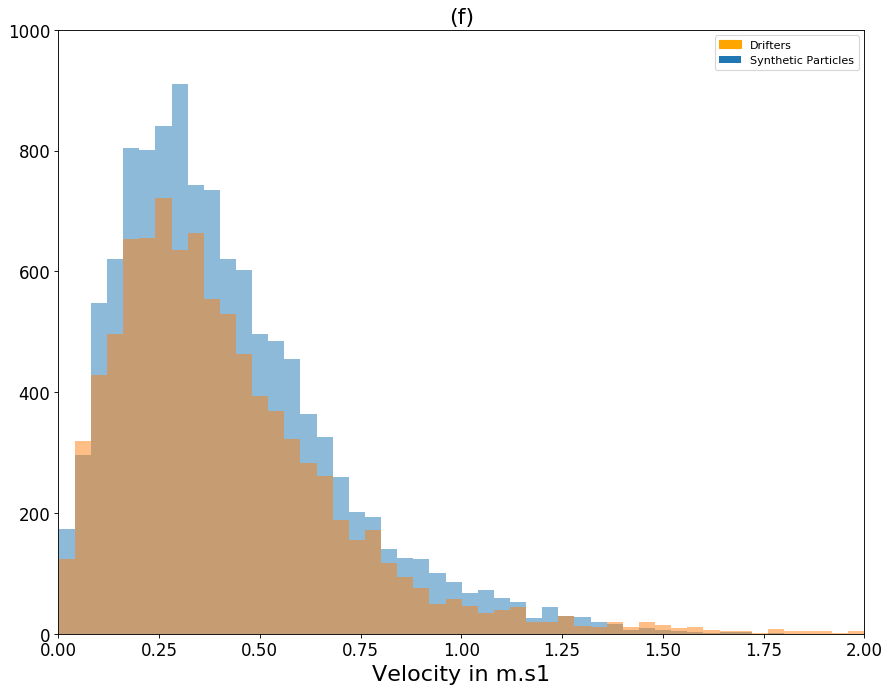

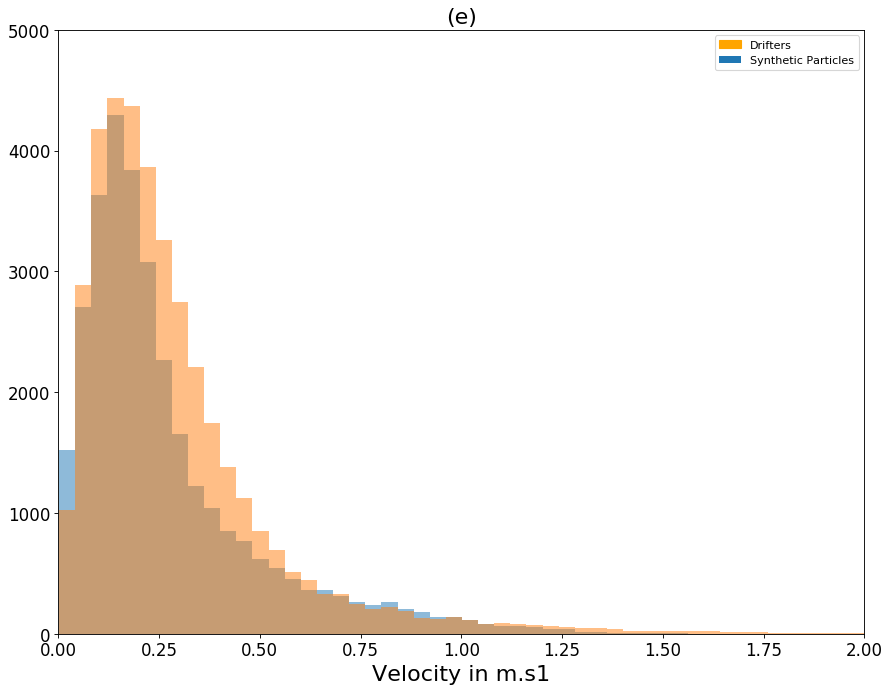

In [14]:
##### import cmocean as cm
from matplotlib.pyplot import figure
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import numpy.ma as ma
from   mpl_toolkits.basemap import Basemap, cm
import matplotlib.patches as mpatches
from scipy.stats import norm

pa_vel_a = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Agulhas/parcel_vel.txt", sep="\t")
dr_vel_a = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Agulhas/drifter_vel.txt", sep="\t")

pa_vel_b = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Benguela/parcel_vel.txt", sep="\t")
dr_vel_b = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Benguela/drifter_vel.txt", sep="\t")

pa_vel_r = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Retro/parcel_vel.txt", sep="\t")
dr_vel_r = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Retro/drifter_vel.txt", sep="\t")

pa_vel_m = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Mada/parcel_vel.txt", sep="\t")
dr_vel_m = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Mada/drifter_vel.txt", sep="\t")

pa_vel_s = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Return Current/parcel_vel.txt", sep="\t")
dr_vel_s = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Return Current/drifter_vel.txt", sep="\t")

pa_vel_a = pa_vel_a.values
pa_vel_a = pa_vel_a.transpose()
pa_vel_a = pa_vel_a[0]
pA_vel = [x for x in pa_vel_a if str(x) != 'nan']
pA_vel = [ '%.2f' % elem for elem in pA_vel ]
pA_vel = np.array(pA_vel).astype(np.float)
pA_vel = pA_vel[np.where( pA_vel > 0 )]

dr_vel_a = dr_vel_a.values/100
dr_vel_a = dr_vel_a.transpose()
dr_vel_a = dr_vel_a[0]
dA_vel = [x for x in dr_vel_a if str(x) != 'nan']
dA_vel = [ '%.3f' % elem for elem in dA_vel ]
dA_vel = np.array(dA_vel).astype(np.float)

fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0,2.5)
plt.ylim(0,300)

bins=np.histogram(np.hstack((pA_vel,dA_vel)), bins=250)[1]
plt.hist(pA_vel, bins, alpha=0.5)
plt.hist(dA_vel, bins, alpha=0.5)

blue = mpatches.Patch(color='orange', label='Drifters')
orange = mpatches.Patch(label='Synthetic Particles')
plt.legend(handles=[blue,orange])
plt.xlabel("Velocity in m.s1", size = 20)
plt.title("(b)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()


pa_vel_b = pa_vel_b.values
pa_vel_b = pa_vel_b.transpose()
pa_vel_b = pa_vel_b[0]
pAb_vel = [x for x in pa_vel_b if str(x) != 'nan']
pAb_vel = [ '%.2f' % elem for elem in pAb_vel ]
pAb_vel = np.array(pAb_vel).astype(np.float)
pAb_vel = pAb_vel[np.where( pAb_vel > 0 )]

dr_vel_b = dr_vel_b.values/100
dr_vel_b = dr_vel_b.transpose()
dr_vel_b = dr_vel_b[0]
dAb_vel = [x for x in dr_vel_b if str(x) != 'nan']
dAb_vel = [ '%.3f' % elem for elem in dAb_vel ]
dAb_vel = np.array(dAb_vel).astype(np.float)

fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0,1)
plt.ylim(0,2500)

binsb=np.histogram(np.hstack((pAb_vel,dAb_vel)), bins=250)[1]
plt.hist(pAb_vel, binsb, alpha=0.5)
plt.hist(dAb_vel, binsb, alpha=0.5)

blue = mpatches.Patch(color='orange', label='Drifters')
orange = mpatches.Patch(label='Synthetic Particles')
plt.legend(handles=[blue,orange])
plt.xlabel("Velocity in m.s1", size = 20)
plt.title("(c)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()


pa_vel_m = pa_vel_m.values
pa_vel_m = pa_vel_m.transpose()
pa_vel_m = pa_vel_m[0]
pAm_vel = [x for x in pa_vel_m if str(x) != 'nan']
pAm_vel = [ '%.2f' % elem for elem in pAm_vel ]
pAm_vel = np.array(pAm_vel).astype(np.float)
pAm_vel = pAm_vel[np.where( pAm_vel > 0 )]

dr_vel_m = dr_vel_m.values/100
dr_vel_m = dr_vel_m.transpose()
dr_vel_m = dr_vel_m[0]
dAm_vel = [x for x in dr_vel_m if str(x) != 'nan']
dAm_vel = [ '%.3f' % elem for elem in dAm_vel ]
dAm_vel = np.array(dAm_vel).astype(np.float)

fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0,2)
plt.ylim(0,1500)

binsm=np.histogram(np.hstack((pAm_vel,dAm_vel)), bins=250)[1]
plt.hist(pAm_vel, binsm, alpha=0.5)
plt.hist(dAm_vel, binsm, alpha=0.5)

blue = mpatches.Patch(color='orange', label='Drifters')
orange = mpatches.Patch(label='Synthetic Particles')
plt.legend(handles=[blue,orange])
plt.xlabel("Velocity in m.s1", size = 20)
plt.title("(d)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()

pa_vel_r = pa_vel_r.values
pa_vel_r = pa_vel_r.transpose()
pa_vel_r = pa_vel_r[0]
pAr_vel = [x for x in pa_vel_r if str(x) != 'nan']
pAr_vel = [ '%.2f' % elem for elem in pAr_vel ]
pAr_vel = np.array(pAr_vel).astype(np.float)
pAr_vel = pAr_vel[np.where( pAr_vel > 0 )]

dr_vel_r = dr_vel_r.values/100
dr_vel_r = dr_vel_r.transpose()
dr_vel_r = dr_vel_r[0]
dAr_vel = [x for x in dr_vel_r if str(x) != 'nan']
dAr_vel = [ '%.3f' % elem for elem in dAr_vel ]
dAr_vel = np.array(dAr_vel).astype(np.float)

fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0,2)
plt.ylim(0,1000)

binsr=np.histogram(np.hstack((pAr_vel,dAr_vel)), bins=250)[1]
plt.hist(pAr_vel, binsr, alpha=0.5)
plt.hist(dAr_vel, binsr, alpha=0.5)

blue = mpatches.Patch(color='orange', label='Drifters')
orange = mpatches.Patch(label='Synthetic Particles')
plt.legend(handles=[blue,orange])
plt.xlabel("Velocity in m.s1", size = 20)
plt.title("(f)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()


pa_vel_s = pa_vel_s.values
pa_vel_s = pa_vel_s.transpose()
pa_vel_s = pa_vel_s[0]
pAs_vel = [x for x in pa_vel_s if str(x) != 'nan']
pAs_vel = [ '%.2f' % elem for elem in pAs_vel ]
pAs_vel = np.array(pAs_vel).astype(np.float)
pAs_vel = pAs_vel[np.where( pAs_vel > 0 )]

dr_vel_s = dr_vel_s.values/100
dr_vel_s = dr_vel_s.transpose()
dr_vel_s = dr_vel_s[0]
dAs_vel = [x for x in dr_vel_s if str(x) != 'nan']
dAs_vel = [ '%.3f' % elem for elem in dAs_vel ]
dAs_vel = np.array(dAs_vel).astype(np.float)

fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0,2)
plt.ylim(0,5000)

binss=np.histogram(np.hstack((pAs_vel,dAs_vel)), bins=250)[1]
plt.hist(pAs_vel, binss, alpha=0.5, histtype='bar')
plt.hist(dAs_vel, binss, alpha=0.5)
blue = mpatches.Patch(color='orange', label='Drifters')
orange = mpatches.Patch(label='Synthetic Particles')
plt.legend(handles=[blue,orange])
plt.xlabel("Velocity in m.s1", size = 20)
plt.title("(e)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()

# Q-Q Plot

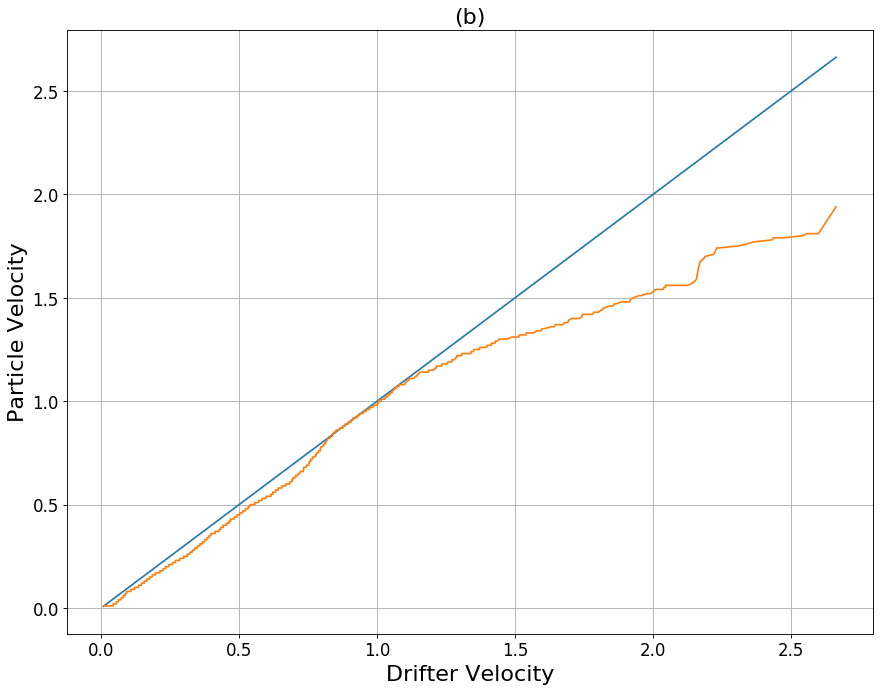

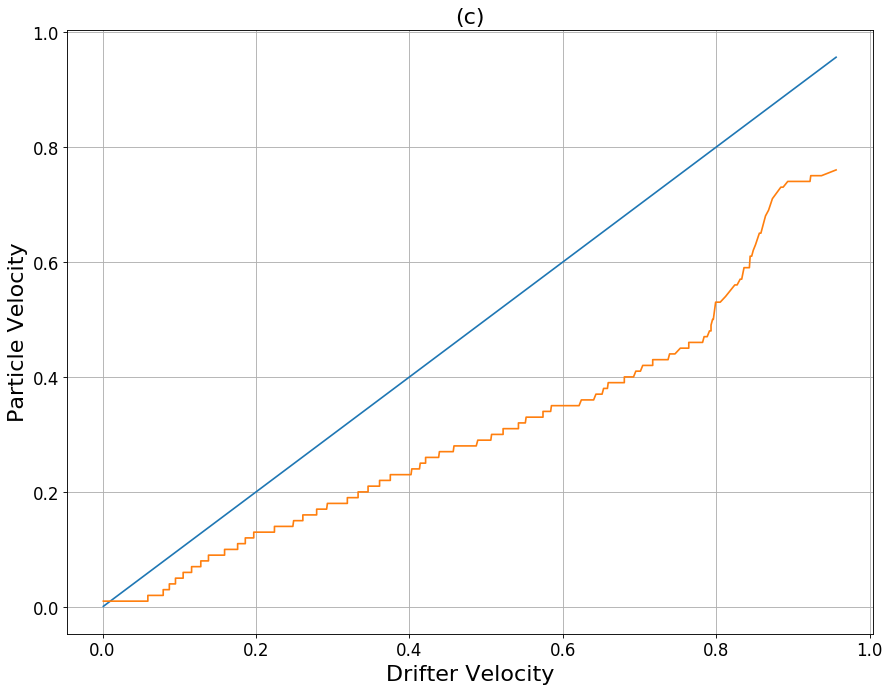

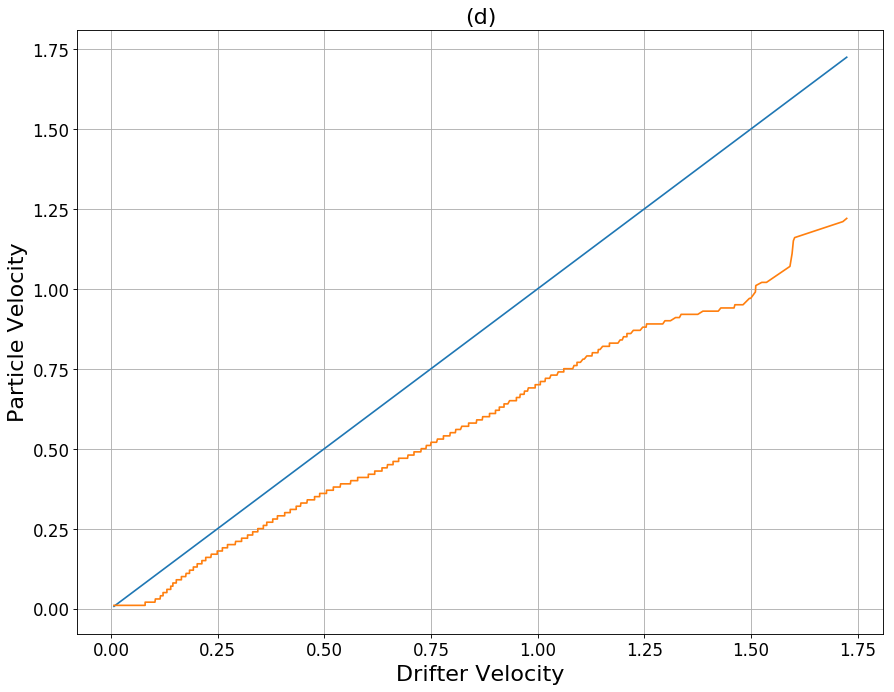

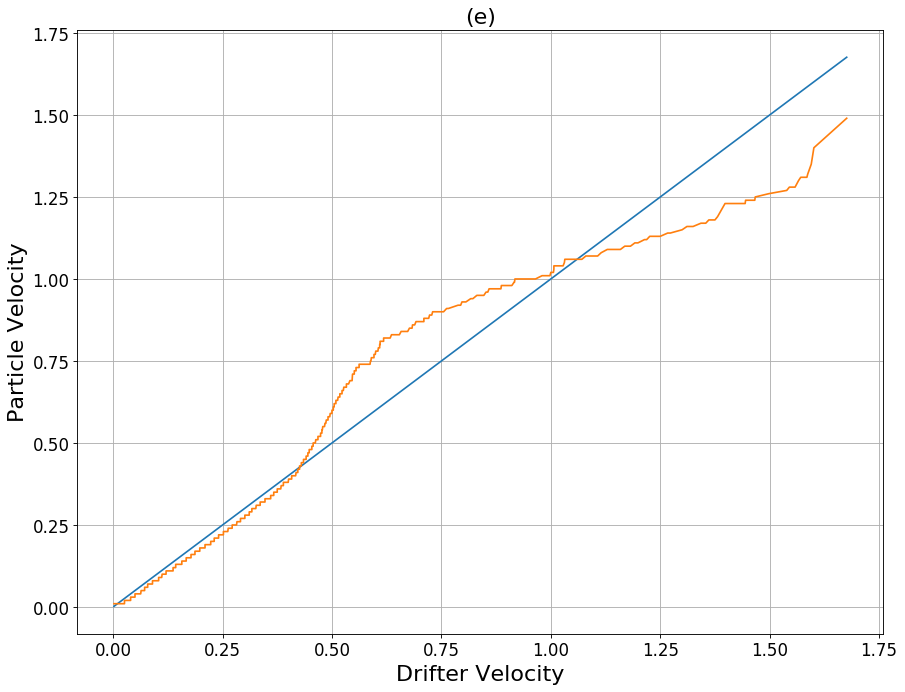

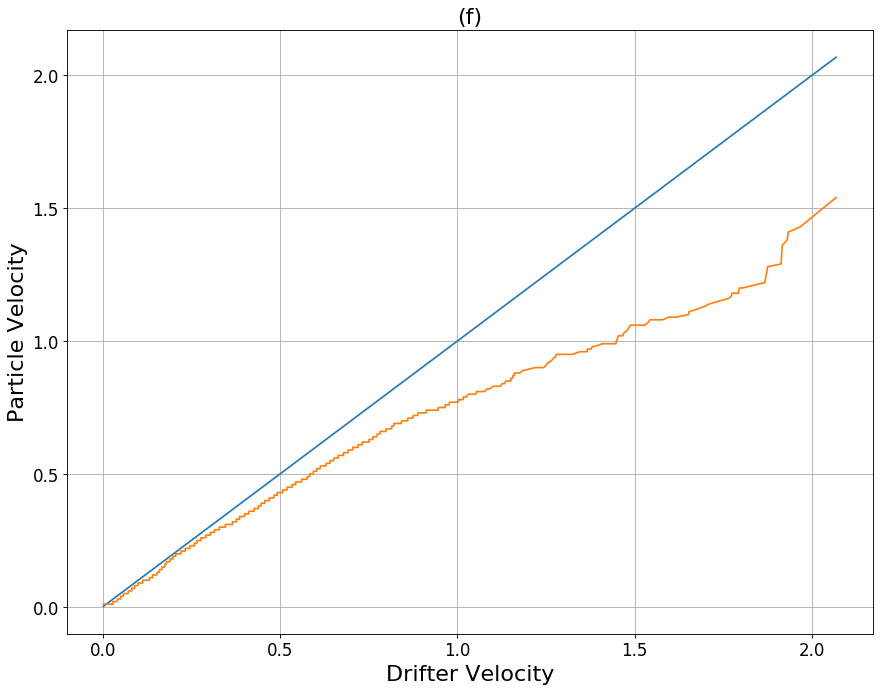

In [9]:
import numpy as np 
import pylab 
import scipy.stats as stats

dA_vel = [i for i in dA_vel if i <= 3]
pA_vel = [i for i in pA_vel if i <= 3]
parc_vel = np.sort(pA_vel[0:len(pA_vel)])
drif_vel = np.sort(dA_vel[0:len(parc_vel)])
fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(drif_vel, drif_vel)
plt.plot(drif_vel, parc_vel)
plt.grid()
plt.xlabel("Drifter Velocity", size = 20)
plt.ylabel("Particle Velocity", size = 20)
plt.title("(b)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

dAb_vel = [i for i in dAb_vel if i <= 3]
pAb_vel = [i for i in pAb_vel if i <= 3]
parc_vel = np.sort(pAb_vel[0:len(parc_vel)])
drif_vel = np.sort(dAb_vel[0:len(parc_vel)])
fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(drif_vel, drif_vel)
plt.plot(drif_vel, parc_vel)
plt.grid()
plt.xlabel("Drifter Velocity", size = 20)
plt.ylabel("Particle Velocity", size = 20)
plt.title("(c)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()

dAm_vel = [i for i in dAm_vel if i <= 3]
pAm_vel = [i for i in pAm_vel if i <= 3]
parc_vel = np.sort(pAm_vel[0:len(parc_vel)])
drif_vel = np.sort(dAm_vel[0:len(parc_vel)])
fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(drif_vel, drif_vel)
plt.plot(drif_vel, parc_vel)
plt.grid()
plt.xlabel("Drifter Velocity", size = 20)
plt.ylabel("Particle Velocity", size = 20)
plt.title("(d)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()

dAs_vel = [i for i in dAs_vel if i <= 3]
pAs_vel = [i for i in pAs_vel if i <= 3]
parc_vel = np.sort(pAs_vel[0:len(parc_vel)])
drif_vel = np.sort(dAs_vel[0:len(parc_vel)])
fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(drif_vel, drif_vel)
plt.plot(drif_vel, parc_vel)
plt.grid()
plt.xlabel("Drifter Velocity", size = 20)
plt.ylabel("Particle Velocity", size = 20)
plt.title("(e)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()

dAr_vel = [i for i in dAr_vel if i <= 3]
pAr_vel = [i for i in pAr_vel if i <= 3]
parc_vel = np.sort(pAr_vel[0:len(parc_vel)])
drif_vel = np.sort(dAr_vel[0:len(parc_vel)])
fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(drif_vel, drif_vel)
plt.plot(drif_vel, parc_vel)
plt.grid()
plt.xlabel("Drifter Velocity", size = 20)
plt.ylabel("Particle Velocity", size = 20)
plt.title("(f)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()


In [ ]:
pa_vel_r = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Retro/parcel_vel.txt", sep="\t")
dr_vel_r = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Retro/drifter_vel.txt", sep="\t")

pa_vel_r = pa_vel_r.values
pa_vel_r = pa_vel_r.transpose()
pa_vel_r = pa_vel_r[0]
pA_vel = [x for x in pa_vel_r if str(x) != 'nan']
pA_vel = [ '%.3f' % elem for elem in pA_vel ]
pA_vel = np.array(pA_vel).astype(np.float)
pArt_vel = pA_vel[np.where( pA_vel > 0 )]

dr_vel_r = dr_vel_r.values/100
dr_vel_r = dr_vel_r.transpose()
dr_vel_r = dr_vel_r[0]
dA_vel = [x for x in dr_vel_r if str(x) != 'nan']
dA_vel = [ '%.3f' % elem for elem in dA_vel ]
dArt_vel = np.array(dA_vel).astype(np.float)
dArt_vel = dArt_vel[np.where( dArt_vel > 0 )]

fig = figure(figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0,1.8)
plt.ylim(0,1000)


plt.hist(pArt_vel, bins=50, alpha=0.5, histtype='bar',ec='blue')
plt.hist(dArt_vel, bins=220, alpha=0.5, histtype='bar',ec='orange')


plt.show()

# Standard Deviation Velocity

In [73]:
from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import matplotlib.patches as mpatches

dri = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/parcel_id.txt", sep="\t")

sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Interpolate_Data2.txt", sep="\t")

d = []
e = []
f = []
g = []

for xx in range(0,len(sites)):
    
    si = dri.values
    
    par = netCDF4.Dataset("/Users/hart-davis/Desktop/Scripts/Simulations/PARCEL_"+str(int(si[xx]))+".nc")
    
    idd = sites.id.values
    
    indx = np.where(idd == si)
    
    plonn = par.variables["lon"][:]
    platt = par.variables["lat"][:]
    
    plon = plonn.data
    plat = platt.data
    
    plon = plon[0]
    plat = plat[0]
    
    dlon = sites.lon.values[indx[0]]
    dlat = sites.lat.values[indx[0]]
    
    dist = [0]
    
    for x in range(0,len(plon)-1):
        
        dist1 = np.arccos(np.cos(np.radians(90-dlat[x]))*np.cos(np.radians(90-plat[x]))+np.sin(np.radians(90-dlat[x]))*np.sin(np.radians(90-plat[x]))*np.cos(np.radians(dlon[x]-plon[x])))*6371
        dist.append(dist1)
        
        distance = np.cumsum(dist)
        
        np.savetxt("/Users/hart-davis/Desktop/Scripts/Domains/Starting/S_Distance_" + str(int(si[xx])) + '.txt', distance, delimiter = "\n")
        

IndexError: index 55 is out of bounds for axis 0 with size 55

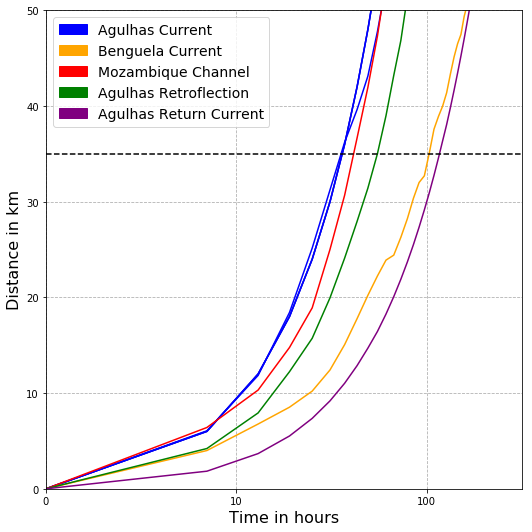

In [18]:
from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import matplotlib.patches as mpatches

sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")
fig = figure(figsize=(13, 10), dpi=160, facecolor='w', edgecolor='k')   
#time = pandas.read_csv("/Users/hart-davis/Desktop/time.txt", sep="\t")

dom = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/time.txt", sep = "\t")
agulh = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Agulhas.txt", sep = "\t")
beng = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Benguela.txt", sep = "\t")
mada = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Madagascar.txt", sep = "\t")
retro = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Retro.txt", sep = "\t")
south = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/ARC_Average.txt", sep = "\t")

#for xx in range(0,1041):
    
#    si = sites.id[xx]
#    nc = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Output_All/CUMSUM_DATA/Distance_" + str(si) + '.txt', sep = "\t")
    
#    distance = nc.values
    
#    par = netCDF4.Dataset("/Users/hart-davis/Desktop/Scripts/Simulations/PARCEL_"+str(int(si))+".nc")
#    ti = par.variables["time"]
#    ti = ti[0]
#    t = (ti[:] - ti[0])/3600

#    tim = t.data[:len(distance)]
#    tim = tim+1
#    tim = np.log10(tim)
    
#    plt.plot(tim,distance, color="grey", alpha = 0.1)


t = dom.values
t = t + 1

fig,ax = plt.subplots(figsize=(7.5,7.5))

a = dom.values
at = t[:len(a)]
at = np.log10(at)

b = agulh.values
bt = t[:len(b)]
bt = np.log10(bt)

c = beng.values
ct = t[:len(c)]
ct = np.log10(ct)

d = mada.values
dt = t[:len(d)]
dt = np.log10(dt)

e = retro.values
et = t[:len(e)]
et = np.log10(et)

f = south.values
ft = t[:len(f)]
ft = np.log10(ft)

ax.plot(at,a,color='grey')
ax.plot(bt,b,color="blue")
ax.plot(ct,c,color='orange')
ax.plot(dt,d,color='red')
ax.plot(et,e,color='green')
ax.plot(ft,f,color='purple')


plt.xlabel("Time in hours", fontsize ="16")
plt.ylabel("Distance in km", fontsize ="16")

plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,2))
plt.xticks( np.arange(5), ("0","10","100","10^3"))
plt.ylim(0,50)
plt.xlim(0,2.5)
plt.grid(linestyle="--")

plt.axhline(y = 35, linestyle="--",color="black")

#blue = mpatches.Patch(color='grey', label='Domain')
orange = mpatches.Patch(color='blue',label='Agulhas Current')
black = mpatches.Patch(color='orange', label='Benguela Current')
red = mpatches.Patch(color='red',label='Mozambique Channel')
green = mpatches.Patch(color='green', label='Agulhas Retroflection')
purple = mpatches.Patch(color='purple',label='Agulhas Return Current')

plt.legend(handles=[orange,black,red,green,purple],prop={'size': 14})
#plt.title("(b)")
plt.tight_layout()
plt.show()


In [182]:
str(int(si[0]))

'18677'

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


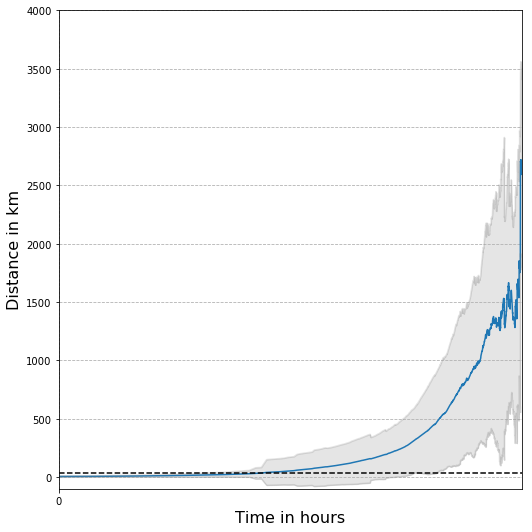

In [17]:
sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")
fig = figure(figsize=(13, 10), dpi=320, facecolor='w', edgecolor='k')   
#time = pandas.read_csv("/Users/hart-davis/Desktop/time.txt", sep="\t")

mean = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Final_Distance.txt", sep = "\t")

std = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/All_Data_Distance.txt")
stdd = std.values

#t = time.values  
#t = t+1
t = np.log10(t)
mean = mean.values
mean = mean[:len(stdd)]
mean = mean.reshape(len(mean))


fig,ax = plt.subplots(figsize=(7.5,7.5))

time = t[:len(stdd)]
time = time.reshape(len(mean))

stdd = stdd.reshape(len(mean))

y = mean
y1 = y - (stdd)
y2 = y + (stdd)

ax.plot(time, y)
ax.plot(time, y1, color='grey', alpha=0.2)
ax.plot(time, y2, color='grey', alpha=0.2)

ax.fill_between(time, y2, y1, color='grey', alpha='0.2')

plt.xlabel("Time in hours", fontsize ="16")
plt.ylabel("Distance in km", fontsize ="16")

plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,2))
plt.xticks( np.arange(5), ("0","10","100","1000","10000"))
plt.ylim(-100,4000)
plt.xlim(0,t.max())
plt.grid(linestyle="--")
plt.axhline(y = 35, linestyle="--",color="black")
#plt.title("(a)")

plt.tight_layout()
plt.show()



# Plotting STD Fill Plots

In [130]:
bt = t[:len(b)]
i = range(0,len(bt))
i

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


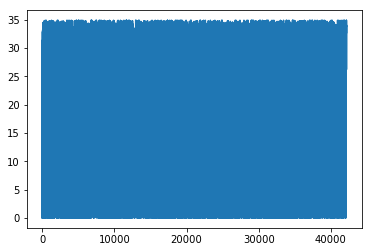

In [184]:
average = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Output_All/CUMSUM_DATA/final.txt", sep = "\t")

ve = average.values
a = ve.transpose()
c = np.where(a < 35)
b = a[np.where(a < 35)]
plt.plot(b)
plt.show()

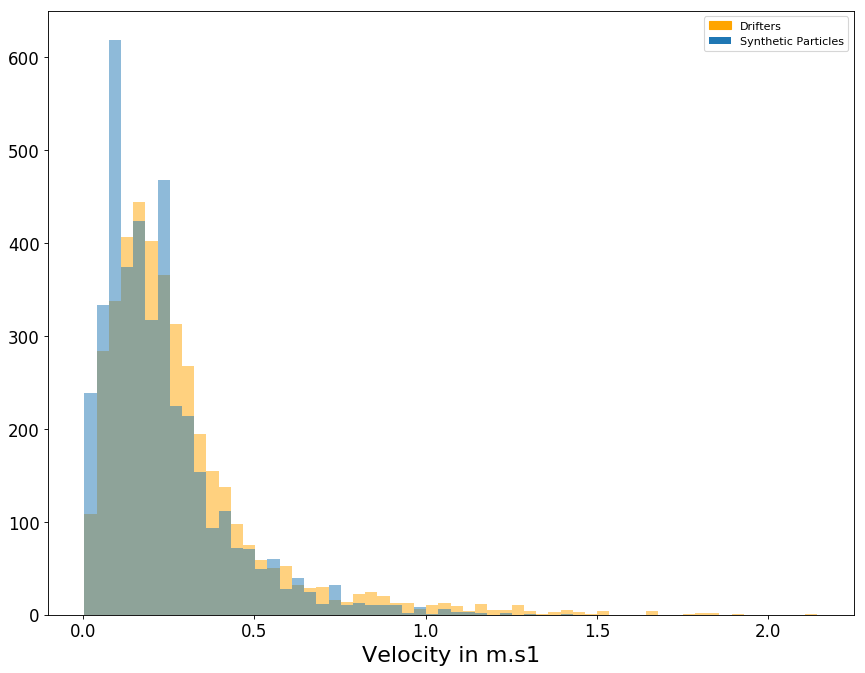

In [190]:
sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")
par = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Output_All/parcel_interpolate_data.txt", sep="\t")
    
dri = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Interpolate_Data2.txt", sep="\t")

u = []
v = []
for x in range(0,104):
    
    si = sites.id[x]
    
    y = a[x]
    
    t = np.where(y < 35)
    
    indx = t[0]
    
    
    idd = dri.id.values
    
    iddd = np.where(idd == si)
    
    r = iddd[0]
    
    xw = indx + r[0]
    
    lon = dri.lon[xw]
    lat = dri.lat[xw]
    aspeed = dri.speed[xw]/100
    speed = [i for i in aspeed if i <= 3]
    
    pid = par.id.values
    pidd = np.where(pid == si)
    
    pr = pidd[0]
    
    pxw = indx + pr[0]
    
    plon = par.lon[pxw]
    plat = par.lat[pxw]
    pspeed = par.velocity[pxw]
    
    pa_vel_s = pspeed.values
    
    pAs_vel = pa_vel_s
    #pAs_vel = [x for x in pa_vel_s if str(x) != 'nan']
    pAs_vel = [ '%.2f' % elem for elem in pAs_vel ]
    pAs_vel = np.array(pAs_vel).astype(np.float)
    pAs_vel = pAs_vel[np.where( pAs_vel > 0 )]
    pspeed = pAs_vel
    
    u.extend(speed)
    v.extend(pspeed)
    
fig = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')   
binss=np.histogram(np.hstack((u,v)), bins=60)[1]
plt.hist(u, binss, alpha=0.5,color="orange")
plt.hist(v, binss, alpha=0.5)
blue = mpatches.Patch(color='orange', label='Drifters')
orange = mpatches.Patch(label='Synthetic Particles')
plt.legend(handles=[blue,orange])
plt.xlabel("Velocity in m.s1", size = 20)
#plt.title("(e)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [39]:
np.savetxt("/Users/hart-davis/Desktop/parcel_vel_35km.txt", v, delimiter = "\n")
np.savetxt("/Users/hart-davis/Desktop/drifter_vel_35km.txt", u, delimiter = "\n")